# Import useful packages

In [1]:
import csv
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
from prophet import Prophet
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import new pickle files

In [2]:
# Load the data from the pickle file
with open('df_1_selected.pickle', 'rb') as f:
    df_1 = pickle.load(f)

with open('df_3_selected.pickle', 'rb') as f:
    df_3 = pickle.load(f)

with open('df_4_selected.pickle', 'rb') as f:
    df_4 = pickle.load(f)

with open('df_5_selected.pickle', 'rb') as f:
    df_5 = pickle.load(f)

with open('df_6_selected.pickle', 'rb') as f:
    df_6 = pickle.load(f)

with open('df_8_selected.pickle', 'rb') as f:
    df_8 = pickle.load(f)

with open('df_9_selected.pickle', 'rb') as f:
    df_9 = pickle.load(f)

with open('df_11_selected.pickle', 'rb') as f:
    df_11 = pickle.load(f)    

with open('df_12_selected.pickle', 'rb') as f:
    df_12 = pickle.load(f)

with open('df_13_selected.pickle', 'rb') as f:
    df_13 = pickle.load(f)    

with open('df_14_selected.pickle', 'rb') as f:
    df_14 = pickle.load(f)    

with open('df_16_selected.pickle', 'rb') as f:
    df_16 = pickle.load(f)

with open('df_20_selected.pickle', 'rb') as f:
    df_20 = pickle.load(f)  

with open('df_36_selected.pickle', 'rb') as f:
    df_36 = pickle.load(f)  

# Modelling

Prophet is adept at capturing diverse forms of seasonality, making it suitable for application in product categories exhibiting such patterns. Specifically, it is well-suited for utilization in product groups 3, 4, 5, 8, 9, 11, 12, 14, 16, and 36, where evidence of distinct seasonal variations exists.

Using Prophet in product categories lacking evident seasonality isn't detrimental, but employing such a sophisticated algorithm isn't necessary. In cases where sales remain relatively constant over time without seasonal fluctuations, simpler statistical methods suffice. Measures like mean and median effectively capture central tendencies and are robust to outliers, unlike other statistical metrics. Moreover, since this time series data have a constant mean and variance, employing basic statistics ensures stable estimates of central tendency. Therefore, for product groups 1, 6, 13, and 20, simpler statistical approaches suffice.

CatBoost is an adept gradient boosting algorithm tailored to effectively manage categorical features, rendering it highly suitable for diverse predictive modeling endeavors. Its innate capability to handle categorical variables mitigates the necessity for extensive preprocessing. Furthermore, it integrates regularization methods and employs gradient boosting to construct a tree ensemble, effectively combating overfitting. Consequently, it is slated to be employed for predicting outcomes across all product categories.

We will evaluate the performance of each model using Root Mean Squared Error (RMSE).

## Defining useful functions

Mean

In [3]:
def mean_split(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Define a range of train sizes to try
    train_sizes = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9] 

    best_rmse = np.inf
    best_train_size = None
    best_test_size = None
    best_predictions = None
    best_train_features = None
    best_train_target = None
    best_test_features = None
    best_test_target = None
    pred= []  # List to store predictions

    # Iterate over different train sizes
    for train_size in train_sizes:
        # Calculate corresponding test size
        test_size = 1 - train_size

        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

        # Calculate RMSE for mean forecast
        mean_sales = np.mean(y_train)
        mean_forecast = [mean_sales] * len(y_test)
        rmse = np.sqrt(mean_squared_error(y_test, mean_forecast))

        # Check if current RMSE is better than the best RMSE found so far
        if rmse < best_rmse:
            best_rmse = rmse
            best_train_size = train_size
            best_test_size = test_size
            best_predictions = mean_forecast
            best_train_features = X_train
            best_train_target = y_train
            best_test_features = X_test
            best_test_target = y_test
            
            pred.append(mean_forecast)

    print("Best Train Size:", best_train_size)
    print("Best Test Size:", best_test_size)
    print("Best RMSE (Mean Forecast):", best_rmse)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot train target
    plt.plot(best_train_target.index, best_train_target, label='Train Target', color='blue')
    
    # Plot test target
    plt.plot(best_test_target.index, best_test_target, label='Test Target', color='green')
    
    # Plot predictions
    plt.plot(best_test_target.index, best_predictions, label='Median Forecast', color='orange')

    plt.title('Best Train Target, Test Target, and Median Forecast')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    return best_train_features, best_train_target, best_test_features, best_test_target, best_predictions

# Source: ChatGPT

Median

In [4]:
def median_split(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Define a range of train sizes to try
    train_sizes = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9] 

    best_rmse = np.inf
    best_train_size = None
    best_test_size = None
    best_predictions = None
    best_train_features = None
    best_train_target = None
    best_test_features = None
    best_test_target = None
    pred = []  # List to store predictions

    # Iterate over different train sizes
    for train_size in train_sizes:
        # Calculate corresponding test size
        test_size = 1 - train_size

        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

        # Calculate RMSE for median forecast
        median_sales = np.median(y_train)
        median_forecast = [median_sales] * len(y_test)
        rmse = np.sqrt(mean_squared_error(y_test, median_forecast))

        # Check if current RMSE is better than the best RMSE found so far
        if rmse < best_rmse:
            best_rmse = rmse
            best_train_size = train_size
            best_test_size = test_size
            best_predictions = median_forecast
            best_train_features = X_train
            best_train_target = y_train
            best_test_features = X_test
            best_test_target = y_test

            pred.append(median_forecast)

    print("Best Train Size:", best_train_size)
    print("Best Test Size:", best_test_size)
    print("Best RMSE (Median Forecast):", best_rmse)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot train target
    plt.plot(best_train_target.index, best_train_target, label='Train Target', color='blue')
    
    # Plot test target
    plt.plot(best_test_target.index, best_test_target, label='Test Target', color='green')
    
    # Plot predictions
    plt.plot(best_test_target.index, best_predictions, label='Median Forecast', color='orange')

    plt.title('Best Train Target, Test Target, and Median Forecast')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    return best_train_features, best_train_target, best_test_features, best_test_target, best_predictions

# Source: ChatGPT

Prophet

In [5]:
def prophet_split(df, target_column):
    df_prophet = df.reset_index()
    df_prophet.rename(columns={'Date': 'ds', target_column: 'y'},inplace=True)
    
    # Define a range of train sizes to try
    train_sizes = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9] 

    best_rmse = np.inf
    best_train_size = None
    best_test_size = None
    best_predictions = None
    best_train_features = None
    best_train_target = None
    best_test_features = None
    best_test_target = None
    pred= [] 

    # Iterate over different train sizes
    for train_size in train_sizes:
        # Calculate corresponding test size
        test_size = 1 - train_size

        # Split the data into train and test sets
        df_train, df_test = train_test_split(df_prophet, test_size=test_size, shuffle=False)
        

        # Initialize Prophet model
        model = Prophet()

        # Fit Prophet model
        model.fit(df_train)

        # Make future dataframe for forecasting
        future = model.make_future_dataframe(periods=len(df_test))

        # Forecast
        forecast = model.predict(future)

        # Extract predicted values for the test set
        predicted_values = forecast.tail(len(df_test))['yhat'].values

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(df_test['y'], predicted_values))

        # Check if current RMSE is better than the best RMSE found so far
        if rmse < best_rmse:
            best_rmse = rmse
            best_train_size = train_size
            best_test_size = test_size
            best_predictions = predicted_values
            best_train_features = df_train.drop(columns=['y'])
            best_train_target = df_train['y']
            best_test_features = df_test.drop(columns=['y'])
            best_test_target = df_test['y']

            pred.append(predicted_values)

    print("Best Train Size:", best_train_size)
    print("Best Test Size:", best_test_size)
    print("Best RMSE (Prophet Forecast):", best_rmse)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot train target
    plt.plot(best_train_features['ds'], best_train_target, label='Train Target', color='blue')
    
    # Plot test target
    plt.plot(best_test_features['ds'], best_test_target, label='Test Target', color='green')
    
    # Plot predictions
    plt.plot(best_test_features['ds'], best_predictions, label='Prophet Forecast', color='orange')

    plt.title('Best Train Target, Test Target, and Prophet Forecast')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    return best_train_features, best_train_target, best_test_features, best_test_target, best_predictions

# Source: ChatGPT

Catboost

In [6]:
def catboost_split(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Define a range of train sizes to try
    train_sizes = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9] 

    best_rmse = np.inf
    best_train_size = None
    best_test_size = None
    best_predictions = None
    best_train_features = None
    best_train_target = None
    best_test_features = None
    best_test_target = None
    model_name = 'model_' + target_column

    # Iterate over different train sizes
    for train_size in train_sizes:
        # Calculate corresponding test size
        test_size = 1 - train_size

        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

        # Train CatBoost model
        model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE')
        model.fit(X_train, y_train, verbose=0)

        # Predict using the trained model
        predictions = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, predictions))

        # Check if current RMSE is better than the best RMSE found so far
        if rmse < best_rmse:
            best_rmse = rmse
            best_train_size = train_size
            best_test_size = test_size
            best_predictions = predictions
            best_train_features = X_train
            best_train_target = y_train
            best_test_features = X_test
            best_test_target = y_test

            # Save the trained model in the variable model_target_column
            globals()[model_name] = model

    print("Best Train Size:", best_train_size)
    print("Best Test Size:", best_test_size)
    print("Best RMSE (CatBoost Forecast):", best_rmse)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot train target
    plt.plot(best_train_target.index, best_train_target, label='Train Target', color='blue')
    
    # Plot test target
    plt.plot(best_test_target.index, best_test_target, label='Test Target', color='green')
    
    # Plot predictions
    plt.plot(best_test_target.index, best_predictions, label='CatBoost Forecast', color='purple')

    plt.title('Best Train Target, Test Target, and CatBoost Forecast')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    return best_train_features, best_train_target, best_test_features, best_test_target, best_predictions

Compare RMSE from mean, median and catboost to choose the best model

In [7]:
def compare_mean_median_catboost(df, target_column):
    # Calculate RMSE for mean forecast
    _, _, _, _, mean_predictions = mean_split(df, target_column)
    rmse_mean = np.sqrt(mean_squared_error(df[target_column][-len(mean_predictions):], mean_predictions))

    # Calculate RMSE for median forecast
    _, _, _, _, median_predictions = median_split(df, target_column)
    rmse_median = np.sqrt(mean_squared_error(df[target_column][-len(median_predictions):], median_predictions))

    # Calculate RMSE for CatBoost forecast
    _, _, _, _, catboost_predictions = catboost_split(df, target_column)
    rmse_catboost = np.sqrt(mean_squared_error(df[target_column][-len(catboost_predictions):], catboost_predictions))

    # Create a dictionary to store RMSE values for each method
    rmse_values = {
        'Mean': rmse_mean,
        'Median': rmse_median,
        'CatBoost': rmse_catboost
    }

    # Find the method with the lowest RMSE
    best_method = min(rmse_values, key=rmse_values.get)
    best_rmse = rmse_values[best_method]

    print("RMSE values:")
    for method, rmse in rmse_values.items():
        print(f"{method}: {rmse}")

    print(f"\nBest method: {best_method} (RMSE: {best_rmse})")

    return best_method

# ChatGPT


Compare RMSE from prophet and catboost to choose the best model

In [8]:
def compare_prophet_catboost(df, target_column):

    # Calculate RMSE for CatBoost forecast
    _, _, _, _, catboost_predictions = catboost_split(df, target_column)
    rmse_catboost = np.sqrt(mean_squared_error(df[target_column][-len(catboost_predictions):], catboost_predictions))

    # Calculate RMSE for Prophet forecast
    _, _, _, _, prophet_predictions = prophet_split(df, target_column)
    rmse_prophet = np.sqrt(mean_squared_error(df[target_column][-len(prophet_predictions):], prophet_predictions))

    # Create a dictionary to store RMSE values for each method
    rmse_values = {
        'CatBoost': rmse_catboost,
        'Prophet': rmse_prophet
    }

    # Find the method with the lowest RMSE
    best_method = min(rmse_values, key=rmse_values.get)
    best_rmse = rmse_values[best_method]

    print("RMSE values:")
    for method, rmse in rmse_values.items():
        print(f"{method}: {rmse}")

    print(f"\nBest method: {best_method} (RMSE: {best_rmse})")

    return best_method

# ChatGPT

Predic Future Features using Prophet

In [9]:
def prophet_predict_and_join(df,column_name):
    # Define the index
    index = ['2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
             '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
             '2023-01-31', '2023-02-28']

    # Convert the index to datetime format
    index = pd.to_datetime(index)

    # Create the DataFrame with the specified index
    df_final = pd.DataFrame(index=index)

    # Rename the index to 'ds'
    df_final.index.name = 'ds'

    df_final[column_name] = np.nan

    # Iterate over each feature column
    for column in df.columns:
        if column != 'ds':  # Exclude the 'ds' column
            # Extract the data for the current feature
            data = df.reset_index()
            data = data[["Date", column]].rename(columns={"Date": "ds", column: "y"})

            # Create a Prophet model
            model = Prophet()

            # Fit the model
            model.fit(data)

            # Make future dataframe for the next 10 months
            future = model.make_future_dataframe(periods=11, freq='M')

            # Forecast
            forecast = model.predict(future)

            # Extract predicted values for the next 10 months
            predicted_values = forecast.iloc[-10:]['yhat'].values

            # Create a DataFrame with the predicted values and proper index
            predicted_values_df = pd.DataFrame(predicted_values, columns=[column], index=future[-10:]['ds'])

            # Join the predicted values to the original DataFrame
            df_final = df_final.join(predicted_values_df[column])
            
    return df_final

## Product Group 1

Compare the performance of mean, median and catboost, and choose the one with lowest RMSE

Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (Mean Forecast): 3420224.0289761154


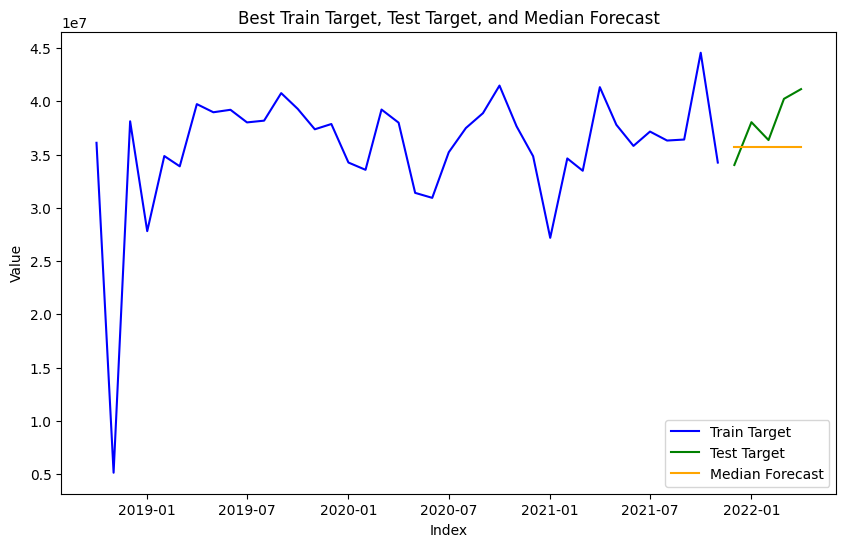

Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (Median Forecast): 2673897.7366295904


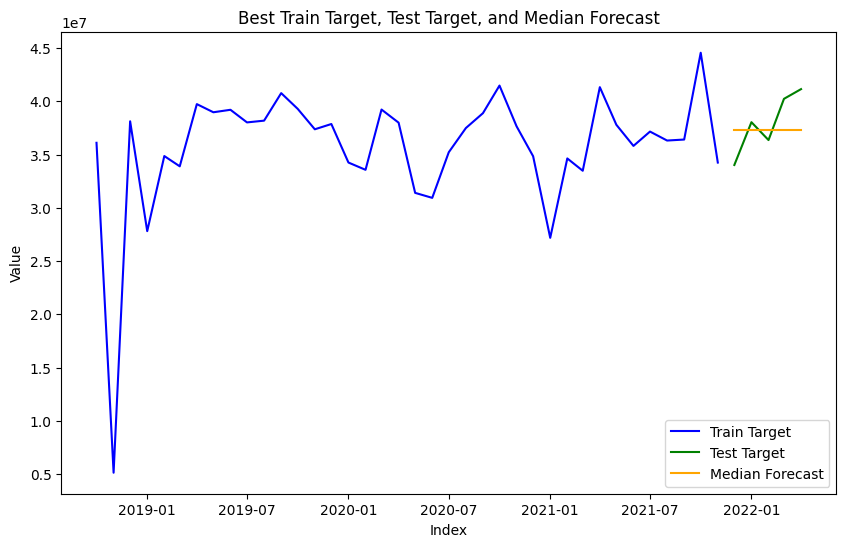

Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (CatBoost Forecast): 2381863.8679212155


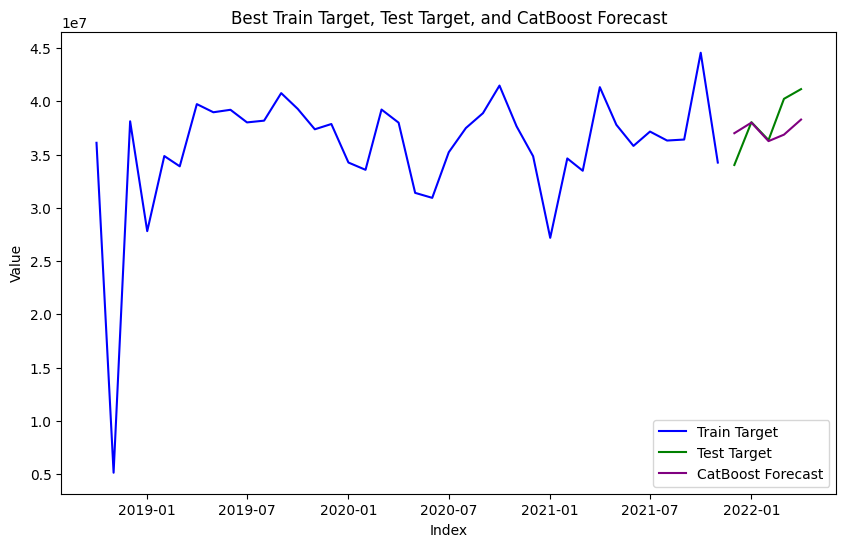

RMSE values:
Mean: 3420224.0289761154
Median: 2673897.7366295904
CatBoost: 2381863.8679212155

Best method: CatBoost (RMSE: 2381863.8679212155)


'CatBoost'

In [10]:
compare_mean_median_catboost(df_1, "GCK_1")

The model with lowest RMSE on test set is Catboost, it will be used to ensemble

In [11]:
df_=df_1.drop(columns=["GCK_1"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [12]:
df_1_future = prophet_predict_and_join(df_, "#1")
df_1_future.head()

12:00:59 - cmdstanpy - INFO - Chain [1] start processing
12:01:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
12:01:02 - cmdstanpy - INFO - Chain [1] start processing
12:01:02 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
12:01:03 - cmdstanpy - INFO - Chain [1] start processing
12:01:04 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#1,China Production Index ME_lag_4,Italy Shipments Index ME_lag_10,US Shipments Index ME,UK Producer Prices EE_lag_5,Germany Producer Prices EE_lag_1,UK Production Index EE_lag_1
ds,,,,,,,
2022-05-31,NaN,264.164414,133.054803,159.315120,NaN,121.690583,130.466384
2022-06-30,NaN,315.372497,182.313726,147.945488,NaN,123.122798,120.060272
2022-07-31,NaN,258.190337,143.248221,164.516225,NaN,123.248822,124.213533
2022-08-31,NaN,286.439578,148.647452,163.988604,NaN,122.846839,114.054911
2022-09-30,NaN,326.559135,158.181832,164.757848,NaN,122.214139,130.472522


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [13]:
predictions_1 = model_GCK_1.predict(df_1_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [14]:
df_1_future["#1"] = predictions_1

In [15]:
df_1_future

,#1,China Production Index ME_lag_4,Italy Shipments Index ME_lag_10,US Shipments Index ME,UK Producer Prices EE_lag_5,Germany Producer Prices EE_lag_1,UK Production Index EE_lag_1
ds,,,,,,,
2022-05-31,4.129236e+07,264.164414,133.054803,159.315120,NaN,121.690583,130.466384
2022-06-30,3.861368e+07,315.372497,182.313726,147.945488,NaN,123.122798,120.060272
2022-07-31,3.835457e+07,258.190337,143.248221,164.516225,NaN,123.248822,124.213533
2022-08-31,3.728382e+07,286.439578,148.647452,163.988604,NaN,122.846839,114.054911
2022-09-30,4.314893e+07,326.559135,158.181832,164.757848,NaN,122.214139,130.472522
2022-10-31,4.154298e+07,290.881557,128.634761,157.209908,NaN,122.359708,140.974433
2022-11-30,4.172137e+07,292.072869,141.313889,163.265687,NaN,124.790266,133.120108
2022-12-31,4.183401e+07,301.471413,192.866030,154.945883,NaN,128.566810,131.166816
2023-01-31,4.183401e+07,300.283433,192.495392,162.810074,NaN,127.204008,132.284712


Plot the sales predicted for each month.

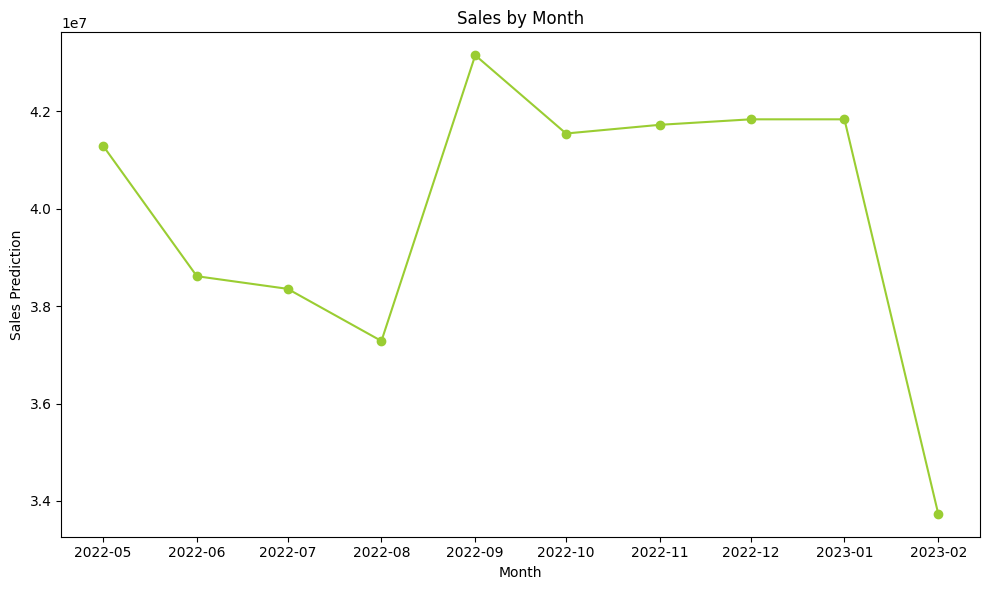

In [123]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_1_future.index, df_1_future['#1'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 3

Compare the performance of prophet and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (CatBoost Forecast): 1446104.8042625794


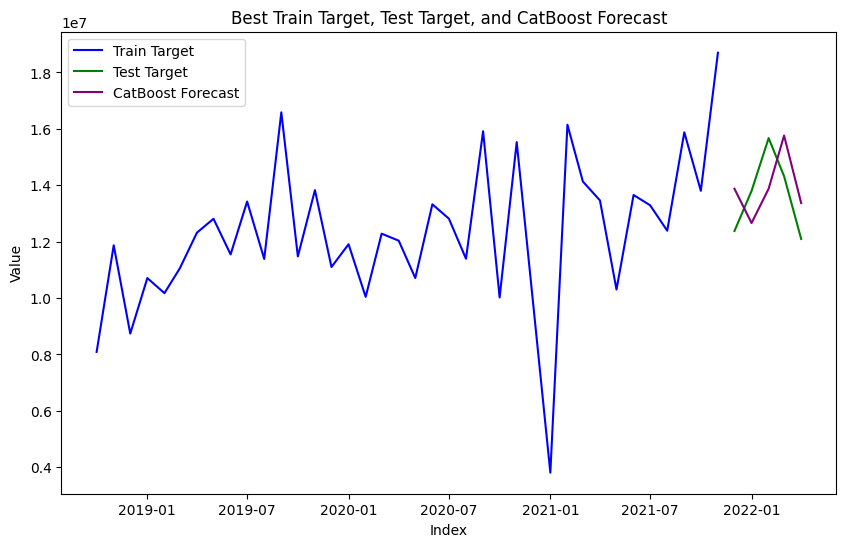

12:03:11 - cmdstanpy - INFO - Chain [1] start processing
12:06:12 - cmdstanpy - INFO - Chain [1] done processing
12:06:13 - cmdstanpy - INFO - Chain [1] start processing
12:08:01 - cmdstanpy - INFO - Chain [1] done processing
12:08:03 - cmdstanpy - INFO - Chain [1] start processing
12:08:04 - cmdstanpy - INFO - Chain [1] done processing
12:08:05 - cmdstanpy - INFO - Chain [1] start processing
12:08:06 - cmdstanpy - INFO - Chain [1] done processing
12:08:08 - cmdstanpy - INFO - Chain [1] start processing
12:08:10 - cmdstanpy - INFO - Chain [1] done processing
12:08:11 - cmdstanpy - INFO - Chain [1] start processing
12:08:12 - cmdstanpy - INFO - Chain [1] done processing
12:08:14 - cmdstanpy - INFO - Chain [1] start processing
12:08:15 - cmdstanpy - INFO - Chain [1] done processing


Best Train Size: 0.85
Best Test Size: 0.15000000000000002
Best RMSE (Prophet Forecast): 2191026.8905094457


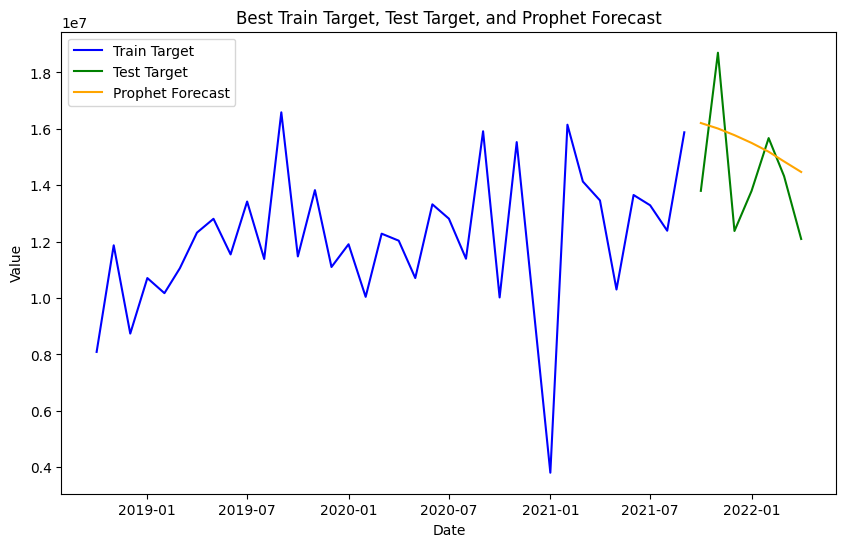

RMSE values:
CatBoost: 1446104.8042625794
Prophet: 2191026.8905094457

Best method: CatBoost (RMSE: 1446104.8042625794)


'CatBoost'

In [16]:
compare_prophet_catboost(df_3, "GCK_3")

# Source: ChatGPT

The model with lowest RMSE on test set is CatBoost, it will be used to ensemble

In [17]:
df_=df_3.drop(columns=["GCK_3"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [18]:
df_3_future = prophet_predict_and_join(df_, "#3")
df_3_future.head()

12:08:18 - cmdstanpy - INFO - Chain [1] start processing
12:08:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
12:08:22 - cmdstanpy - INFO - Chain [1] start processing
12:08:23 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
12:08:25 - cmdstanpy - INFO - Chain [1] start processing
12:08:25 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#3,France Production Index ME_lag_9,Germany Production Index ME_lag_1,Italy Production Index ME_lag_9,Italy Shipments Index ME_lag_9,Japan Production Index ME_lag_8,US Shipments Index ME_lag_6,Europe Production Index ME,World Natural Gas Price Index,Germany Producer Prices EE,World Production Index EE,Japan Production Index EE_lag_10
ds,,,,,,,,,,,,
2022-05-31,NaN,160.034694,123.594071,124.392211,157.294780,151.353347,144.088931,108.787563,122.333095,123.311012,136.350990,91.614570
2022-06-30,NaN,116.017776,93.910559,126.605505,139.405507,147.643801,134.160495,122.469853,135.708397,124.274308,140.505468,101.666792
2022-07-31,NaN,106.061351,117.949746,109.294921,132.364567,132.516632,138.486676,107.059100,146.062152,124.278781,136.298855,134.085315
2022-08-31,NaN,96.014284,108.927955,78.766346,128.286851,115.196422,156.609030,133.470990,176.210247,124.421807,151.320021,132.332107
2022-09-30,NaN,91.345391,119.576634,82.017999,86.548359,133.403937,161.703152,141.087012,227.700975,125.449917,151.596474,126.518294


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [19]:
predictions_3 = model_GCK_3.predict(df_3_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [20]:
df_3_future["#3"] = predictions_3

In [21]:
df_3_future

,#3,France Production Index ME_lag_9,Germany Production Index ME_lag_1,Italy Production Index ME_lag_9,Italy Shipments Index ME_lag_9,Japan Production Index ME_lag_8,US Shipments Index ME_lag_6,Europe Production Index ME,World Natural Gas Price Index,Germany Producer Prices EE,World Production Index EE,Japan Production Index EE_lag_10
ds,,,,,,,,,,,,
2022-05-31,1.370241e+07,160.034694,123.594071,124.392211,157.294780,151.353347,144.088931,108.787563,122.333095,123.311012,136.350990,91.614570
2022-06-30,1.457772e+07,116.017776,93.910559,126.605505,139.405507,147.643801,134.160495,122.469853,135.708397,124.274308,140.505468,101.666792
2022-07-31,1.332075e+07,106.061351,117.949746,109.294921,132.364567,132.516632,138.486676,107.059100,146.062152,124.278781,136.298855,134.085315
2022-08-31,1.484660e+07,96.014284,108.927955,78.766346,128.286851,115.196422,156.609030,133.470990,176.210247,124.421807,151.320021,132.332107
2022-09-30,1.362031e+07,91.345391,119.576634,82.017999,86.548359,133.403937,161.703152,141.087012,227.700975,125.449917,151.596474,126.518294
2022-10-31,1.412872e+07,89.601033,121.722217,79.922898,89.764093,162.964570,166.255489,133.321240,245.060810,125.431677,151.502826,107.351982
2022-11-30,1.392757e+07,130.696119,125.290778,126.401465,136.576692,133.004724,158.347669,122.432209,216.545115,127.229559,144.364379,126.956707
2022-12-31,1.391557e+07,137.853198,119.889200,118.811618,137.782968,151.963118,145.160396,123.289377,182.311459,128.264812,132.461764,146.371736
2023-01-31,1.360372e+07,114.558184,115.892199,120.522437,138.302934,151.576215,160.726773,117.867497,117.763033,129.379901,130.503936,124.817343


Plot the sales predicted for each month.

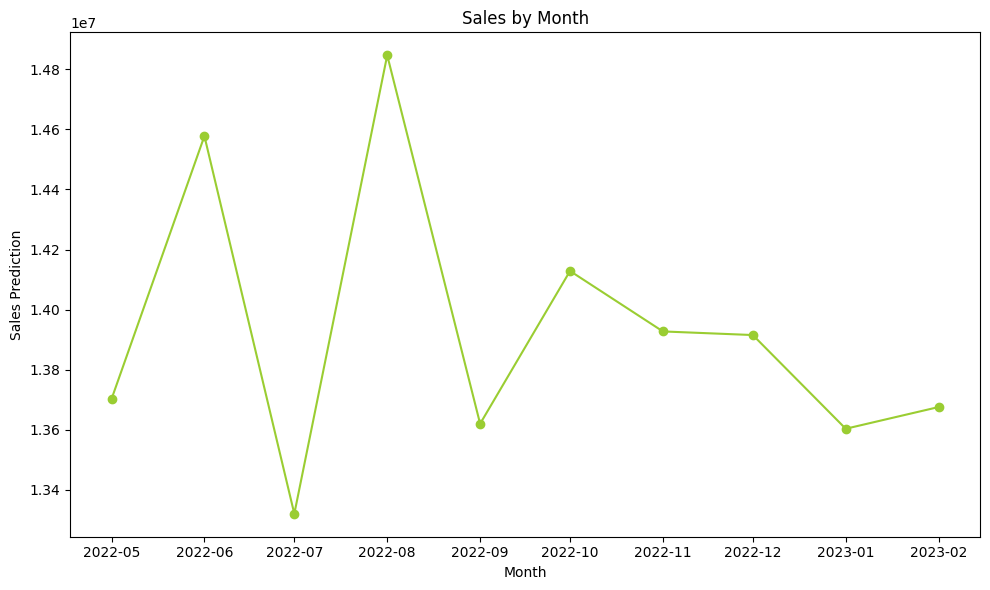

In [122]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_3_future.index, df_3_future['#3'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 4

Compare the performance of prophet and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (CatBoost Forecast): 61686.70831896685


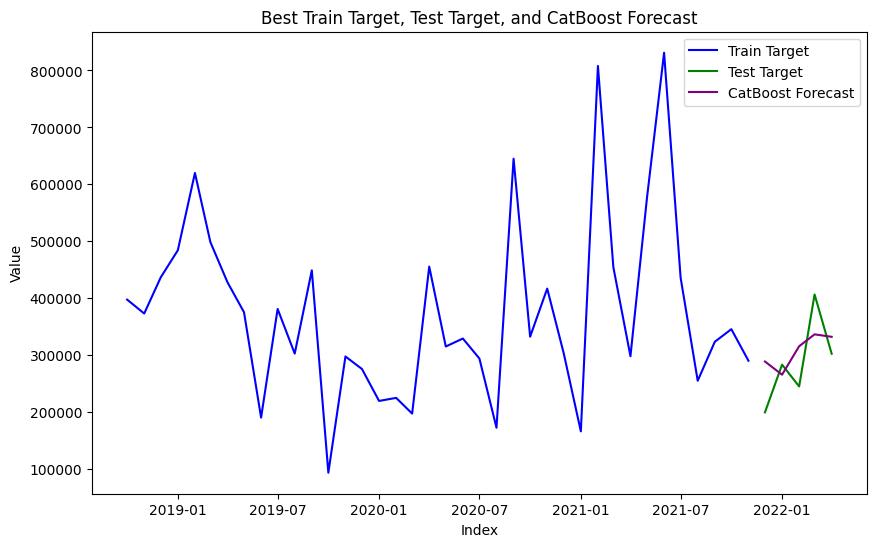

12:09:01 - cmdstanpy - INFO - Chain [1] start processing
12:09:03 - cmdstanpy - INFO - Chain [1] done processing
12:09:05 - cmdstanpy - INFO - Chain [1] start processing
12:09:06 - cmdstanpy - INFO - Chain [1] done processing
12:09:08 - cmdstanpy - INFO - Chain [1] start processing
12:09:09 - cmdstanpy - INFO - Chain [1] done processing
12:09:10 - cmdstanpy - INFO - Chain [1] start processing
12:09:11 - cmdstanpy - INFO - Chain [1] done processing
12:09:12 - cmdstanpy - INFO - Chain [1] start processing
12:09:13 - cmdstanpy - INFO - Chain [1] done processing
12:09:15 - cmdstanpy - INFO - Chain [1] start processing
12:09:16 - cmdstanpy - INFO - Chain [1] done processing
12:09:17 - cmdstanpy - INFO - Chain [1] start processing
12:09:18 - cmdstanpy - INFO - Chain [1] done processing


Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (Prophet Forecast): 136150.86893178284


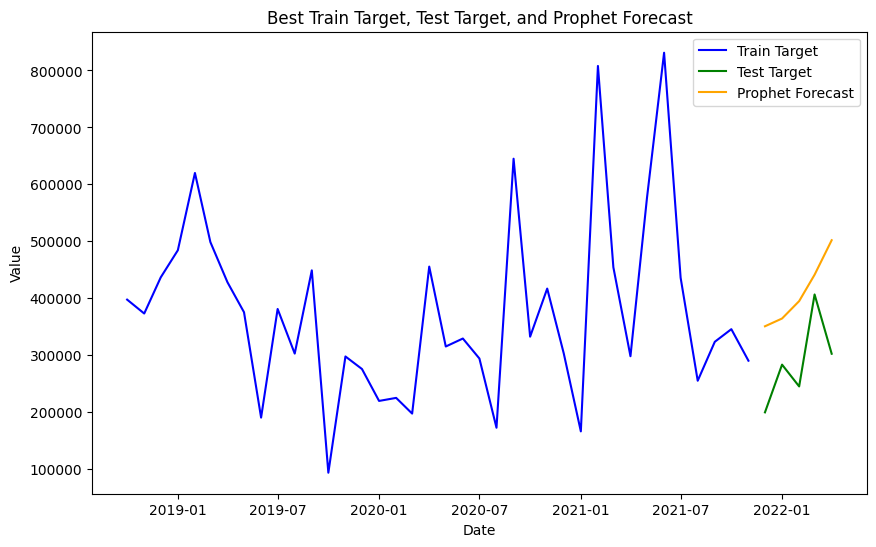

RMSE values:
CatBoost: 61686.70831896685
Prophet: 136150.86893178284

Best method: CatBoost (RMSE: 61686.70831896685)


'CatBoost'

In [22]:
compare_prophet_catboost(df_4, "GCK_4")

# Source: ChatGPT

The model with lowest RMSE on test set is CatBoost, it will be used to ensemble

In [23]:
df_=df_4.drop(columns=["GCK_4"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [24]:
df_4_future = prophet_predict_and_join(df_, "#4")
df_4_future.head()

12:09:21 - cmdstanpy - INFO - Chain [1] start processing
12:09:22 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
12:09:23 - cmdstanpy - INFO - Chain [1] start processing
12:09:24 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
12:09:26 - cmdstanpy - INFO - Chain [1] start processing
12:09:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#4,China Production Index ME_lag_11,France Production Index ME_lag_10,Italy Production Index ME_lag_10,Italy Shipments Index ME_lag_10,Japan Production Index ME_lag_10,Switzerland Production Index ME_lag_12,Europe Shipments Index ME_lag_10,World Base Metals Price_lag_12,US Producer Prices EE_lag_12,UK Producer Prices EE_lag_8,Italy Producer Prices EE_lag_11
ds,,,,,,,,,,,,
2022-05-31,NaN,344.576330,101.889846,95.098763,133.054803,106.855117,70.657237,138.354760,124.691539,136.286345,NaN,109.161333
2022-06-30,NaN,321.744329,137.627479,102.275062,182.313726,83.824377,90.620879,194.949795,138.859839,137.983460,NaN,113.461842
2022-07-31,NaN,316.577854,118.234372,122.958900,143.248221,159.218132,108.121783,152.642593,169.745012,152.757612,NaN,109.472364
2022-08-31,NaN,286.107886,109.985304,105.575888,148.647452,155.655279,107.396807,162.757242,158.161937,140.362154,NaN,112.360657
2022-09-30,NaN,291.689701,102.757623,77.820746,158.181832,141.125358,95.525945,159.008575,159.742425,142.705833,NaN,112.441312


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [25]:
predictions_4 = model_GCK_4.predict(df_4_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [26]:
df_4_future["#4"] = predictions_4

In [27]:
df_4_future

,#4,China Production Index ME_lag_11,France Production Index ME_lag_10,Italy Production Index ME_lag_10,Italy Shipments Index ME_lag_10,Japan Production Index ME_lag_10,Switzerland Production Index ME_lag_12,Europe Shipments Index ME_lag_10,World Base Metals Price_lag_12,US Producer Prices EE_lag_12,UK Producer Prices EE_lag_8,Italy Producer Prices EE_lag_11
ds,,,,,,,,,,,,
2022-05-31,325724.210701,344.576330,101.889846,95.098763,133.054803,106.855117,70.657237,138.354760,124.691539,136.286345,NaN,109.161333
2022-06-30,343719.681354,321.744329,137.627479,102.275062,182.313726,83.824377,90.620879,194.949795,138.859839,137.983460,NaN,113.461842
2022-07-31,315926.868244,316.577854,118.234372,122.958900,143.248221,159.218132,108.121783,152.642593,169.745012,152.757612,NaN,109.472364
2022-08-31,308364.225253,286.107886,109.985304,105.575888,148.647452,155.655279,107.396807,162.757242,158.161937,140.362154,NaN,112.360657
2022-09-30,324525.343015,291.689701,102.757623,77.820746,158.181832,141.125358,95.525945,159.008575,159.742425,142.705833,NaN,112.441312
2022-10-31,299286.562255,315.232152,101.752190,84.813185,128.634761,124.415381,102.177726,151.903511,158.318216,142.248439,NaN,112.729408
2022-11-30,303792.703260,315.710491,104.041181,87.600587,141.313889,142.534898,108.470668,158.731707,160.898601,143.593314,NaN,113.235311
2022-12-31,316691.710671,317.358261,148.018574,137.935446,192.866030,170.896025,102.894651,191.416361,163.635454,146.355055,NaN,112.822626
2023-01-31,330234.929760,370.326299,155.024853,128.654185,192.495392,138.838373,97.602436,200.890905,181.563691,148.946312,NaN,113.941770


Plot the sales predicted for each month.

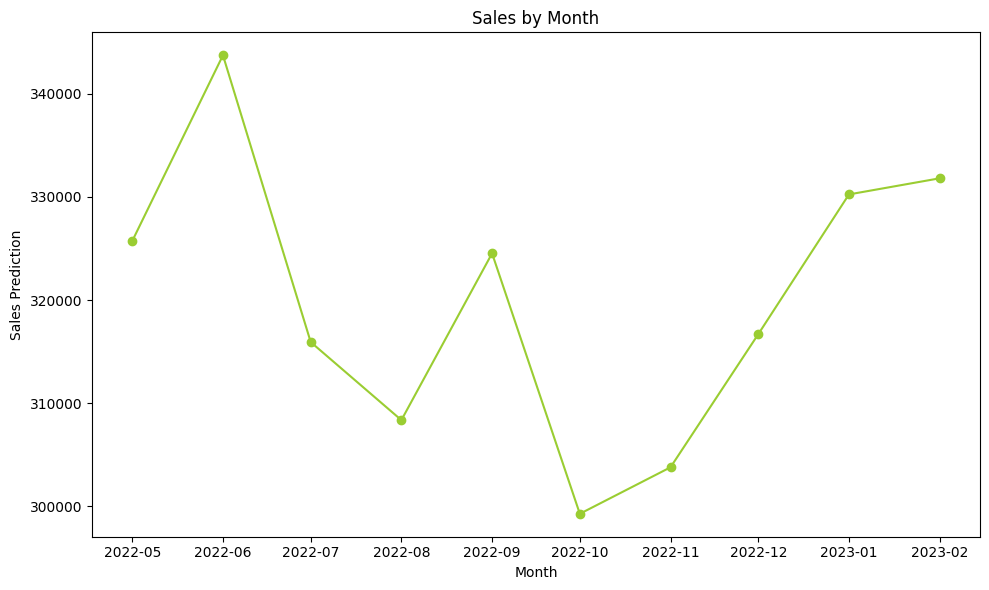

In [121]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_4_future.index, df_4_future['#4'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 5

Compare the performance of prophet and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.85
Best Test Size: 0.15000000000000002
Best RMSE (CatBoost Forecast): 2178314.1374688423


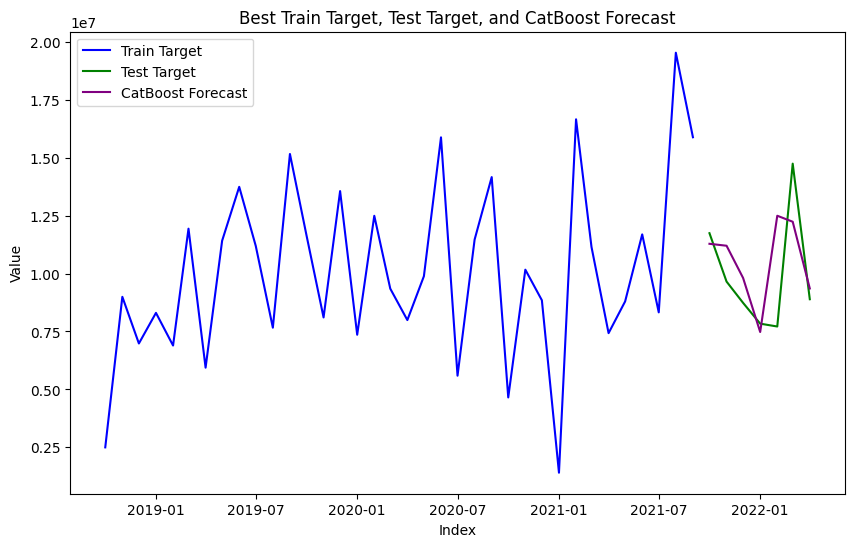

14:36:21 - cmdstanpy - INFO - Chain [1] start processing
14:36:22 - cmdstanpy - INFO - Chain [1] done processing
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:24 - cmdstanpy - INFO - Chain [1] done processing
14:36:25 - cmdstanpy - INFO - Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] done processing
14:36:27 - cmdstanpy - INFO - Chain [1] start processing
14:36:27 - cmdstanpy - INFO - Chain [1] done processing
14:36:29 - cmdstanpy - INFO - Chain [1] start processing
14:36:29 - cmdstanpy - INFO - Chain [1] done processing
14:36:31 - cmdstanpy - INFO - Chain [1] start processing
14:36:31 - cmdstanpy - INFO - Chain [1] done processing
14:36:32 - cmdstanpy - INFO - Chain [1] start processing
14:36:33 - cmdstanpy - INFO - Chain [1] done processing


Best Train Size: 0.85
Best Test Size: 0.15000000000000002
Best RMSE (Prophet Forecast): 14849334.640224371


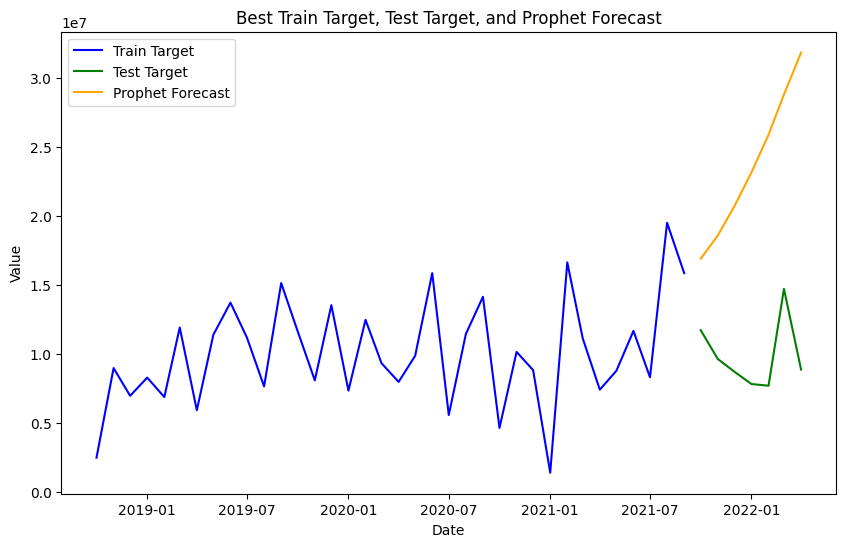

RMSE values:
CatBoost: 2178314.1374688423
Prophet: 14849334.640224371

Best method: CatBoost (RMSE: 2178314.1374688423)


'CatBoost'

In [28]:
compare_prophet_catboost(df_5, "GCK_5")

# Source: ChatGPT

The model with lowest RMSE on test set is CatBoost, it will be used to ensemble

In [29]:
df_=df_5.drop(columns=["GCK_5"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [30]:
df_5_future = prophet_predict_and_join(df_, "#5")
df_5_future.head()

14:36:34 - cmdstanpy - INFO - Chain [1] start processing
14:36:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:36:36 - cmdstanpy - INFO - Chain [1] start processing
14:36:37 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:36:38 - cmdstanpy - INFO - Chain [1] start processing
14:36:38 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#5,China Production Index ME_lag_3,France Shipments Index ME_lag_1,Germany Production Index ME_lag_1,Italy Production Index ME_lag_5,Japan Shipments Index ME_lag_10,US Shipments Index ME_lag_12,Europe Production Index ME_lag_1,UK Producer Prices EE_lag_12,World Machinery and Equipment NEC_lag_3,World Production Index EE_lag_11,UK Production Index EE
ds,,,,,,,,,,,,
2022-05-31,NaN,320.767248,117.240007,123.594071,86.153892,101.870742,146.184083,131.906986,148.137539,149.487237,142.625731,116.974262
2022-06-30,NaN,266.469504,106.779285,93.910559,81.934064,87.113066,143.026839,110.308025,155.928490,141.842142,128.240507,120.484411
2022-07-31,NaN,298.011003,111.234667,117.949746,125.060101,160.836300,129.320005,123.676149,161.300627,143.159536,162.696153,112.004885
2022-08-31,NaN,338.507546,100.739078,108.927955,110.677950,157.867490,150.222765,107.325702,163.536523,133.425140,159.114314,127.935655
2022-09-30,NaN,300.669447,133.166974,119.576634,111.461735,143.276701,141.833449,134.363819,NaN,135.570012,157.650068,139.102417


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [31]:
predictions_5 = model_GCK_5.predict(df_5_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [32]:
df_5_future["#5"] = predictions_5

In [33]:
df_5_future

,#5,China Production Index ME_lag_3,France Shipments Index ME_lag_1,Germany Production Index ME_lag_1,Italy Production Index ME_lag_5,Japan Shipments Index ME_lag_10,US Shipments Index ME_lag_12,Europe Production Index ME_lag_1,UK Producer Prices EE_lag_12,World Machinery and Equipment NEC_lag_3,World Production Index EE_lag_11,UK Production Index EE
ds,,,,,,,,,,,,
2022-05-31,1.129177e+07,320.767248,117.240007,123.594071,86.153892,101.870742,146.184083,131.906986,148.137539,149.487237,142.625731,116.974262
2022-06-30,1.243598e+07,266.469504,106.779285,93.910559,81.934064,87.113066,143.026839,110.308025,155.928490,141.842142,128.240507,120.484411
2022-07-31,1.181100e+07,298.011003,111.234667,117.949746,125.060101,160.836300,129.320005,123.676149,161.300627,143.159536,162.696153,112.004885
2022-08-31,1.288767e+07,338.507546,100.739078,108.927955,110.677950,157.867490,150.222765,107.325702,163.536523,133.425140,159.114314,127.935655
2022-09-30,1.058064e+07,300.669447,133.166974,119.576634,111.461735,143.276701,141.833449,134.363819,NaN,135.570012,157.650068,139.102417
2022-10-31,1.044631e+07,298.684993,147.814047,121.722217,91.277746,126.428855,132.474817,142.893462,NaN,129.553229,143.809469,130.851624
2022-11-30,1.024870e+07,303.243013,124.785030,125.290778,106.793014,139.930778,133.681097,136.360017,NaN,152.156136,145.904878,128.111466
2022-12-31,1.026112e+07,301.977405,130.106710,119.889200,55.180861,175.265467,122.721868,126.934705,NaN,151.084504,144.947333,128.933352
2023-01-31,1.048791e+07,302.576538,124.360604,115.892199,119.780007,134.076998,127.101587,128.293136,NaN,151.240913,162.210640,102.215881


Plot the sales predicted for each month.

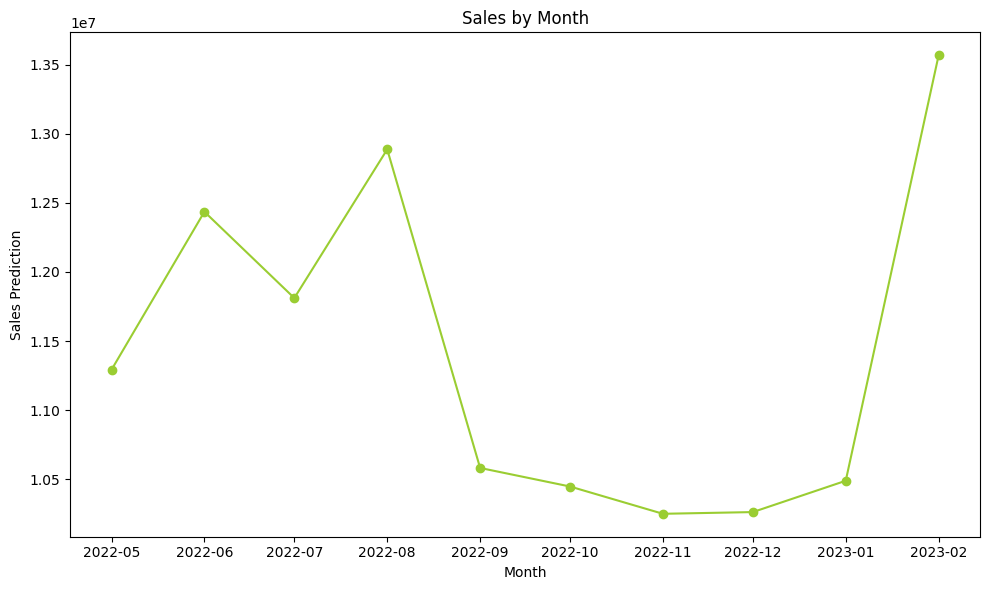

In [120]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_5_future.index, df_5_future['#5'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 6

Compare the performance of mean, median and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.7
Best Test Size: 0.30000000000000004
Best RMSE (Mean Forecast): 221564.30213107666


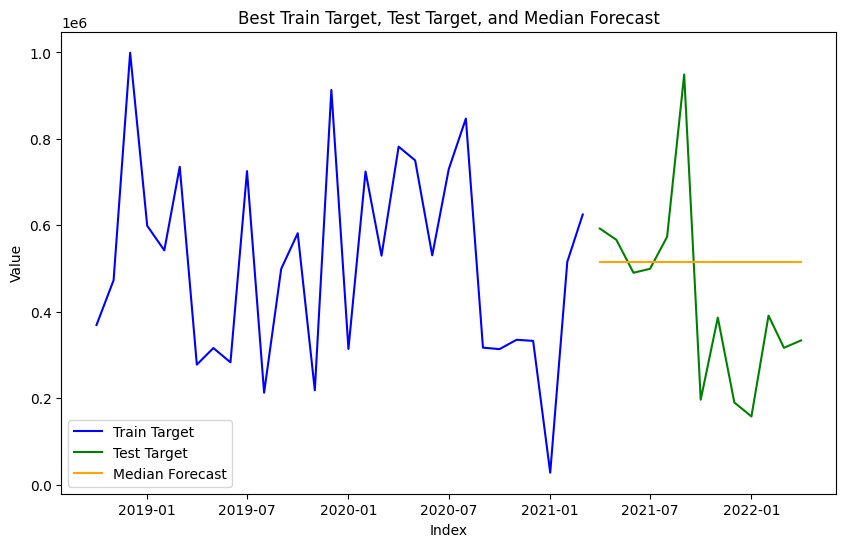

Best Train Size: 0.7
Best Test Size: 0.30000000000000004
Best RMSE (Median Forecast): 224859.67030229548


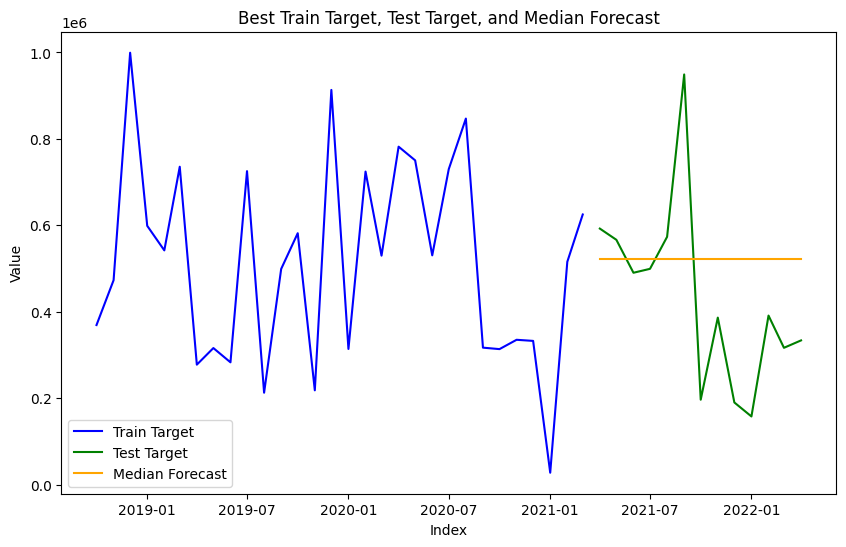

Best Train Size: 0.7
Best Test Size: 0.30000000000000004
Best RMSE (CatBoost Forecast): 168498.52614740387


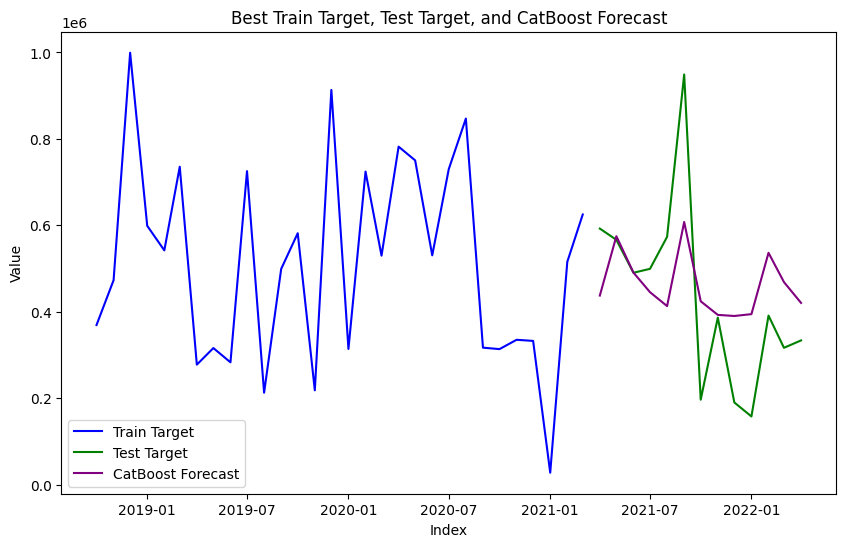

RMSE values:
Mean: 221564.30213107666
Median: 224859.67030229548
CatBoost: 168498.52614740387

Best method: CatBoost (RMSE: 168498.52614740387)


'CatBoost'

In [34]:
compare_mean_median_catboost(df_6, "GCK_6")

# Source: ChatGPT

The model with lowest RMSE on test set is CatBoost, it will be used to ensemble

In [35]:
df_=df_6.drop(columns=["GCK_6"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [36]:
df_6_future = prophet_predict_and_join(df_, "#6")
df_6_future.head()

14:38:13 - cmdstanpy - INFO - Chain [1] start processing
14:38:13 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:38:14 - cmdstanpy - INFO - Chain [1] start processing
14:38:15 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:38:16 - cmdstanpy - INFO - Chain [1] start processing
14:38:17 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#6,France Shipments Index ME_lag_1,Germany Production Index ME_lag_5,Germany Shipments Index ME_lag_1,Italy Production Index ME_lag_5,Italy Shipments Index ME_lag_1,UK Producer Prices EE_lag_3,China Producer Prices EE_lag_3,US Production Index EE,Japan Production Index EE_lag_5,Germany Production Index EE
ds,,,,,,,,,,,
2022-05-31,NaN,117.240007,100.830921,153.727561,86.153892,143.522698,NaN,107.224462,113.928142,95.069984,92.397595
2022-06-30,NaN,106.779285,103.075485,121.585180,81.934064,132.434970,NaN,109.032045,110.489454,113.253468,115.002081
2022-07-31,NaN,111.234667,116.525285,143.915532,125.060101,137.617069,NaN,109.075138,115.835049,129.452538,110.426869
2022-08-31,NaN,100.739078,121.281923,141.073390,110.677950,95.724872,NaN,110.559303,116.503471,103.840756,116.178272
2022-09-30,NaN,133.166974,124.077428,154.823389,111.461735,148.346641,NaN,109.835531,112.199411,111.087469,123.946630


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [37]:
predictions_6 = model_GCK_6.predict(df_6_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [38]:
df_6_future["#6"] = predictions_6

In [39]:
df_6_future

,#6,France Shipments Index ME_lag_1,Germany Production Index ME_lag_5,Germany Shipments Index ME_lag_1,Italy Production Index ME_lag_5,Italy Shipments Index ME_lag_1,UK Producer Prices EE_lag_3,China Producer Prices EE_lag_3,US Production Index EE,Japan Production Index EE_lag_5,Germany Production Index EE
ds,,,,,,,,,,,
2022-05-31,345224.766315,117.240007,100.830921,153.727561,86.153892,143.522698,NaN,107.224462,113.928142,95.069984,92.397595
2022-06-30,529278.107715,106.779285,103.075485,121.585180,81.934064,132.434970,NaN,109.032045,110.489454,113.253468,115.002081
2022-07-31,443701.758130,111.234667,116.525285,143.915532,125.060101,137.617069,NaN,109.075138,115.835049,129.452538,110.426869
2022-08-31,484245.417114,100.739078,121.281923,141.073390,110.677950,95.724872,NaN,110.559303,116.503471,103.840756,116.178272
2022-09-30,429744.092182,133.166974,124.077428,154.823389,111.461735,148.346641,NaN,109.835531,112.199411,111.087469,123.946630
2022-10-31,452676.059882,147.814047,93.705360,149.371764,91.277746,164.793706,NaN,106.526943,118.846921,110.500445,120.681592
2022-11-30,534029.455567,124.785030,118.011428,159.651890,106.793014,154.596616,NaN,107.594982,118.729403,115.598493,88.575813
2022-12-31,495531.275899,130.106710,112.495998,158.011520,55.180861,173.824718,NaN,110.427230,116.181939,92.270198,125.939713
2023-01-31,500371.199586,124.360604,126.061047,148.190205,119.780007,119.459822,NaN,108.794433,123.055527,119.285069,114.070514


Plot the sales predicted for each month.

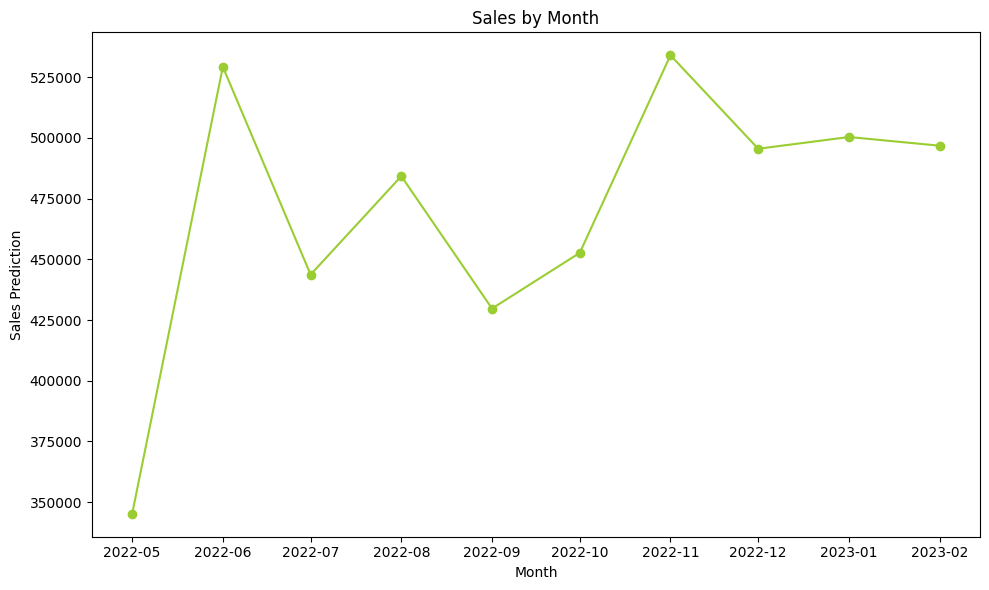

In [119]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_6_future.index, df_6_future['#6'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 8

Compare the performance of prophet and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.85
Best Test Size: 0.15000000000000002
Best RMSE (CatBoost Forecast): 646449.9606190408


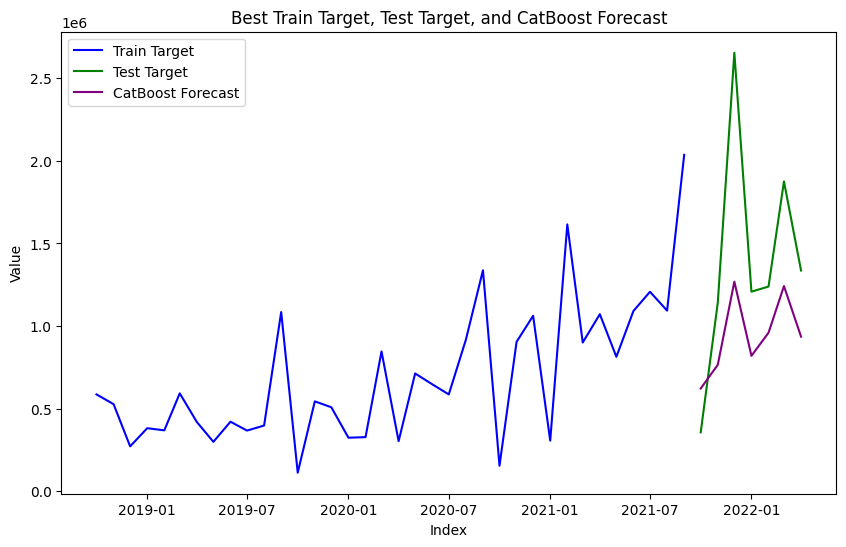

14:40:13 - cmdstanpy - INFO - Chain [1] start processing
14:40:13 - cmdstanpy - INFO - Chain [1] done processing
14:40:14 - cmdstanpy - INFO - Chain [1] start processing
14:40:15 - cmdstanpy - INFO - Chain [1] done processing
14:40:16 - cmdstanpy - INFO - Chain [1] start processing
14:40:17 - cmdstanpy - INFO - Chain [1] done processing
14:40:17 - cmdstanpy - INFO - Chain [1] start processing
14:40:18 - cmdstanpy - INFO - Chain [1] done processing
14:40:19 - cmdstanpy - INFO - Chain [1] start processing
14:40:19 - cmdstanpy - INFO - Chain [1] done processing
14:40:20 - cmdstanpy - INFO - Chain [1] start processing
14:40:20 - cmdstanpy - INFO - Chain [1] done processing
14:40:21 - cmdstanpy - INFO - Chain [1] start processing
14:40:22 - cmdstanpy - INFO - Chain [1] done processing


Best Train Size: 0.75
Best Test Size: 0.25
Best RMSE (Prophet Forecast): 720735.5064081379


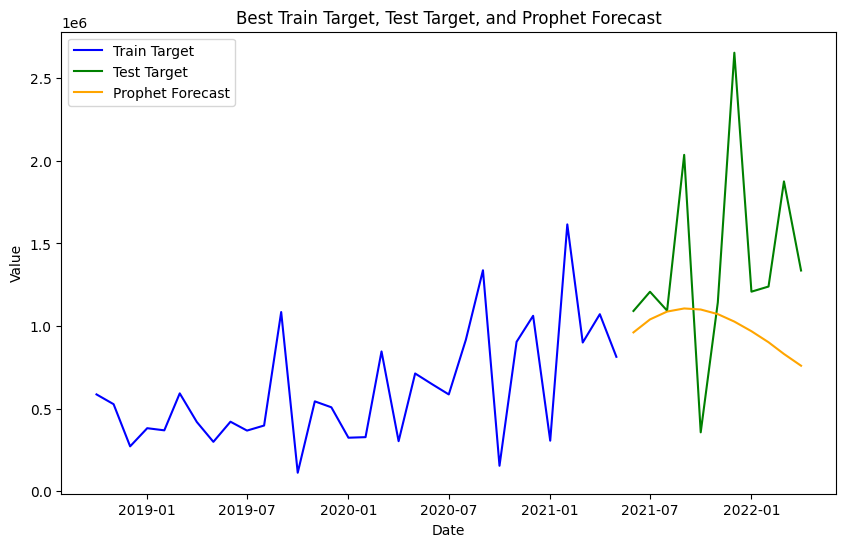

RMSE values:
CatBoost: 646449.9606190408
Prophet: 720735.5064081379

Best method: CatBoost (RMSE: 646449.9606190408)


'CatBoost'

In [40]:
compare_prophet_catboost(df_8, "GCK_8")

# Source: ChatGPT

The model with lowest RMSE on test set is CatBoost, it will be used to ensemble

In [41]:
df_=df_8.drop(columns=["GCK_8"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [42]:
df_8_future = prophet_predict_and_join(df_, "#8")
df_8_future.head()

14:40:23 - cmdstanpy - INFO - Chain [1] start processing
14:40:24 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:40:25 - cmdstanpy - INFO - Chain [1] start processing
14:40:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:40:26 - cmdstanpy - INFO - Chain [1] start processing
14:40:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#8,China Production Index ME_lag_9,France Production Index ME_lag_4,France Shipments Index ME,Germany Production Index ME_lag_7,Italy Shipments Index ME_lag_9,Switzerland Shipments Index ME_lag_12,Europe Production Index ME,World Crude Oil Average Price,UK Producer Prices EE_lag_11,Italy Producer Prices EE_lag_1,World Machinery and Equipment NEC,World Production Index EE
ds,,,,,,,,,,,,,
2022-05-31,NaN,340.239033,76.585248,105.551621,131.401892,157.294780,67.694648,108.787563,78.960888,161.733827,119.970696,131.250805,136.350990
2022-06-30,NaN,266.873238,113.795230,109.938083,120.083676,139.405507,87.693779,122.469853,89.209513,168.322443,120.645101,134.163102,140.505468
2022-07-31,NaN,272.445363,117.812259,100.388268,102.498002,132.364567,105.179633,107.059100,89.039384,170.220124,120.959190,127.460669,136.298855
2022-08-31,NaN,296.394053,93.558926,132.198832,104.466637,128.286851,103.784627,133.470990,109.712180,NaN,121.287019,147.868118,151.320021
2022-09-30,NaN,297.525005,80.665312,146.189699,118.530625,86.548359,92.688179,141.087012,144.573536,NaN,122.293739,144.155419,151.596474


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [43]:
predictions_8 = model_GCK_8.predict(df_8_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [44]:
df_8_future["#8"] = predictions_8

In [45]:
df_8_future

,#8,China Production Index ME_lag_9,France Production Index ME_lag_4,France Shipments Index ME,Germany Production Index ME_lag_7,Italy Shipments Index ME_lag_9,Switzerland Shipments Index ME_lag_12,Europe Production Index ME,World Crude Oil Average Price,UK Producer Prices EE_lag_11,Italy Producer Prices EE_lag_1,World Machinery and Equipment NEC,World Production Index EE
ds,,,,,,,,,,,,,
2022-05-31,1.029364e+06,340.239033,76.585248,105.551621,131.401892,157.294780,67.694648,108.787563,78.960888,161.733827,119.970696,131.250805,136.350990
2022-06-30,1.059563e+06,266.873238,113.795230,109.938083,120.083676,139.405507,87.693779,122.469853,89.209513,168.322443,120.645101,134.163102,140.505468
2022-07-31,1.133259e+06,272.445363,117.812259,100.388268,102.498002,132.364567,105.179633,107.059100,89.039384,170.220124,120.959190,127.460669,136.298855
2022-08-31,1.162775e+06,296.394053,93.558926,132.198832,104.466637,128.286851,103.784627,133.470990,109.712180,NaN,121.287019,147.868118,151.320021
2022-09-30,8.411884e+05,297.525005,80.665312,146.189699,118.530625,86.548359,92.688179,141.087012,144.573536,NaN,122.293739,144.155419,151.596474
2022-10-31,8.573248e+05,300.620393,96.443790,122.182248,124.924525,89.764093,99.044937,133.321240,135.624422,NaN,122.462744,141.387742,151.502826
2022-11-30,9.157674e+05,354.955561,69.284305,126.597805,130.036760,136.576692,105.070589,122.432209,121.951614,NaN,123.950209,142.196944,144.364379
2022-12-31,1.121693e+06,299.068925,114.540196,121.555777,103.312257,137.782968,99.663169,123.289377,102.417437,NaN,125.295486,126.351989,132.461764
2023-01-31,8.947238e+05,328.343576,119.093699,103.928547,129.777208,138.302934,94.541930,117.867497,56.985478,NaN,126.934512,129.292869,130.503936


Plot the sales predicted for each month.

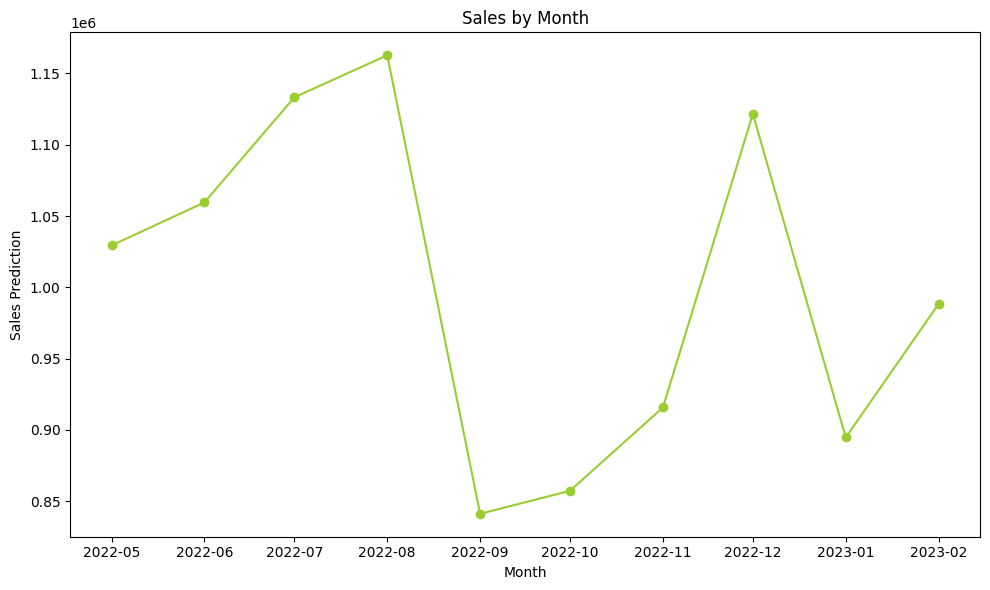

In [118]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_8_future.index, df_8_future['#8'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 9

Compare the performance of prophet and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (CatBoost Forecast): 3814.72223628875


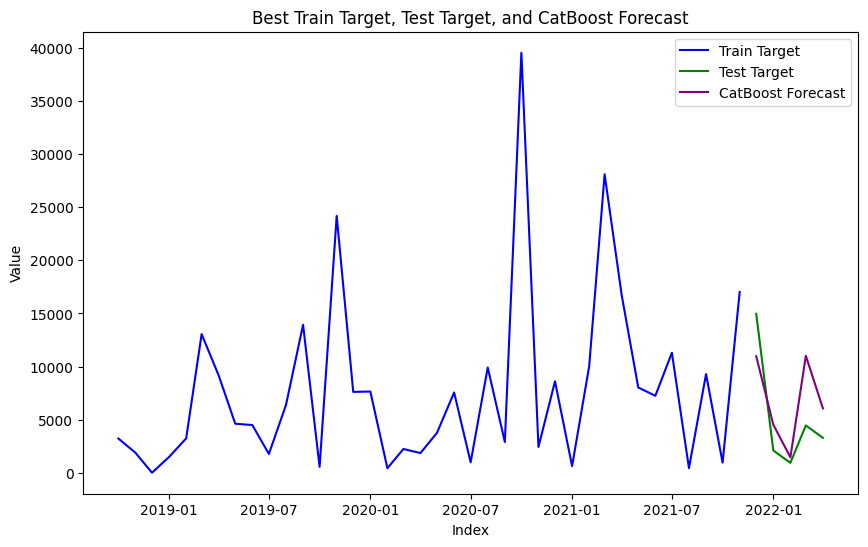

14:42:10 - cmdstanpy - INFO - Chain [1] start processing
14:42:10 - cmdstanpy - INFO - Chain [1] done processing
14:42:11 - cmdstanpy - INFO - Chain [1] start processing
14:42:12 - cmdstanpy - INFO - Chain [1] done processing
14:42:12 - cmdstanpy - INFO - Chain [1] start processing
14:42:13 - cmdstanpy - INFO - Chain [1] done processing
14:42:13 - cmdstanpy - INFO - Chain [1] start processing
14:42:13 - cmdstanpy - INFO - Chain [1] done processing
14:42:14 - cmdstanpy - INFO - Chain [1] start processing
14:42:15 - cmdstanpy - INFO - Chain [1] done processing
14:42:15 - cmdstanpy - INFO - Chain [1] start processing
14:42:16 - cmdstanpy - INFO - Chain [1] done processing
14:42:16 - cmdstanpy - INFO - Chain [1] start processing
14:42:17 - cmdstanpy - INFO - Chain [1] done processing


Best Train Size: 0.75
Best Test Size: 0.25
Best RMSE (Prophet Forecast): 5585.748514051143


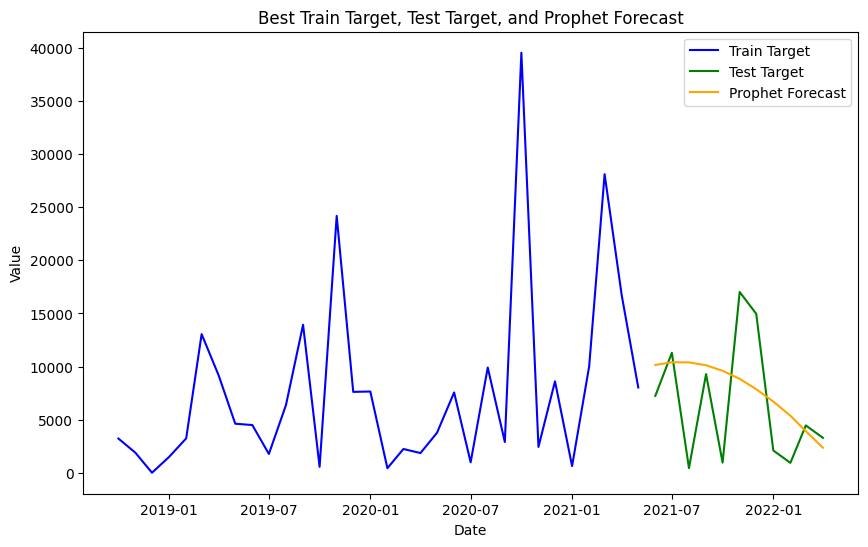

RMSE values:
CatBoost: 3814.72223628875
Prophet: 5585.748514051143

Best method: CatBoost (RMSE: 3814.72223628875)


'CatBoost'

In [46]:
compare_prophet_catboost(df_9, "GCK_9")

# Source: ChatGPT

The model with lowest RMSE on test set is CatBoost, it will be used to ensemble

In [47]:
df_=df_9.drop(columns=["GCK_9"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [48]:
df_9_future = prophet_predict_and_join(df_, "#9")
df_9_future.head()

14:42:18 - cmdstanpy - INFO - Chain [1] start processing
14:42:19 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:42:19 - cmdstanpy - INFO - Chain [1] start processing
14:42:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:42:20 - cmdstanpy - INFO - Chain [1] start processing
14:42:21 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#9,China Production Index ME,Italy Production Index ME_lag_11,Italy Shipments Index ME_lag_7,Japan Production Index ME_lag_10,UK Production Index ME_lag_11,US Production Index ME_lag_11,World Base Metals Price_lag_12,France Producer Prices EE_lag_11,France Machinery and Equipment NEC,Switzerland Production Index EE_lag_5,UK Production Index EE_lag_11,France Production Index EE_lag_11
ds,,,,,,,,,,,,,
2022-05-31,NaN,328.578345,116.223695,139.154202,106.855117,84.346477,105.133323,124.691539,104.320168,82.697390,111.899670,95.653739,74.641136
2022-06-30,NaN,280.025337,91.680035,140.087366,83.824377,95.279497,113.461383,138.859839,104.618493,99.126471,104.666741,133.361095,60.967504
2022-07-31,NaN,277.630275,93.666961,99.572872,159.218132,127.446296,123.063938,169.745012,104.450827,67.612730,95.906562,173.025646,85.547216
2022-08-31,NaN,291.836640,113.759596,100.583496,155.655279,94.810104,112.818543,158.161937,105.387697,119.226892,95.145342,114.530392,92.527880
2022-09-30,NaN,312.707275,99.058034,142.607543,141.125358,99.859086,114.335226,159.742425,105.031305,115.408918,93.248174,122.208066,88.844054


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [49]:
predictions_9 = model_GCK_9.predict(df_9_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [50]:
df_9_future["#9"] = predictions_9

In [51]:
df_9_future

,#9,China Production Index ME,Italy Production Index ME_lag_11,Italy Shipments Index ME_lag_7,Japan Production Index ME_lag_10,UK Production Index ME_lag_11,US Production Index ME_lag_11,World Base Metals Price_lag_12,France Producer Prices EE_lag_11,France Machinery and Equipment NEC,Switzerland Production Index EE_lag_5,UK Production Index EE_lag_11,France Production Index EE_lag_11
ds,,,,,,,,,,,,,
2022-05-31,8434.813307,328.578345,116.223695,139.154202,106.855117,84.346477,105.133323,124.691539,104.320168,82.697390,111.899670,95.653739,74.641136
2022-06-30,6859.432662,280.025337,91.680035,140.087366,83.824377,95.279497,113.461383,138.859839,104.618493,99.126471,104.666741,133.361095,60.967504
2022-07-31,3931.522377,277.630275,93.666961,99.572872,159.218132,127.446296,123.063938,169.745012,104.450827,67.612730,95.906562,173.025646,85.547216
2022-08-31,8908.517190,291.836640,113.759596,100.583496,155.655279,94.810104,112.818543,158.161937,105.387697,119.226892,95.145342,114.530392,92.527880
2022-09-30,7350.136010,312.707275,99.058034,142.607543,141.125358,99.859086,114.335226,159.742425,105.031305,115.408918,93.248174,122.208066,88.844054
2022-10-31,9535.957183,329.577265,74.162365,137.686592,124.415381,78.645515,109.680482,158.318216,104.915978,110.209819,90.932245,101.539339,67.158391
2022-11-30,8385.430242,357.679376,84.259071,139.169490,142.534898,82.380445,111.655400,160.898601,106.276086,100.852909,94.466205,107.172219,72.030423
2022-12-31,5327.203293,207.756584,88.742342,128.275073,170.896025,85.197176,113.456653,163.635454,105.709431,88.619244,99.694983,116.602981,69.306188
2023-01-31,2976.864131,213.305572,136.677001,133.052445,138.838373,111.389072,119.704299,181.563691,105.816549,84.811658,109.243779,134.499856,103.848036


Plot the sales predicted for each month.

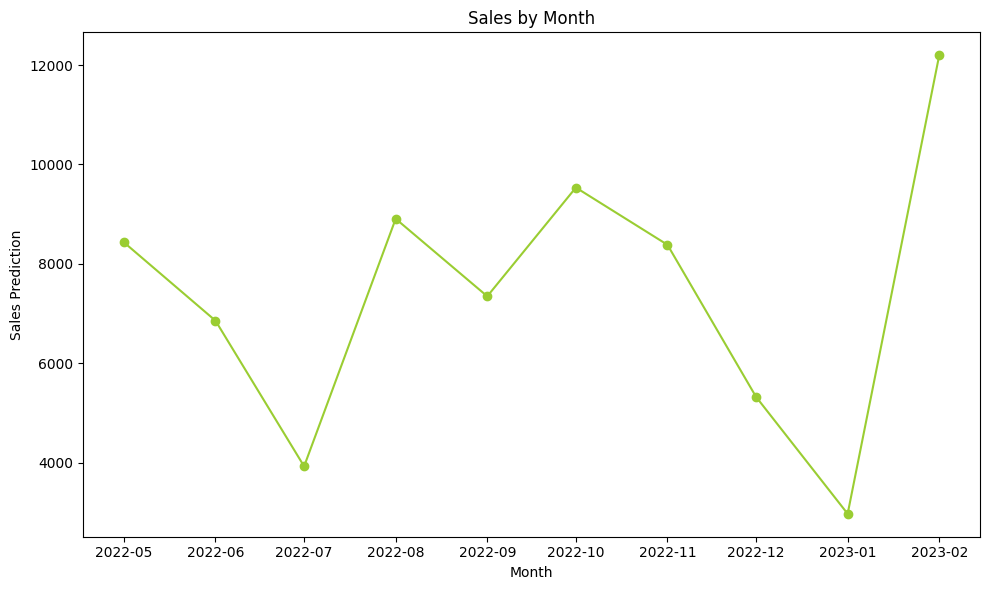

In [117]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_9_future.index, df_9_future['#9'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 11

Compare the performance of prophet and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (CatBoost Forecast): 562751.3388048734


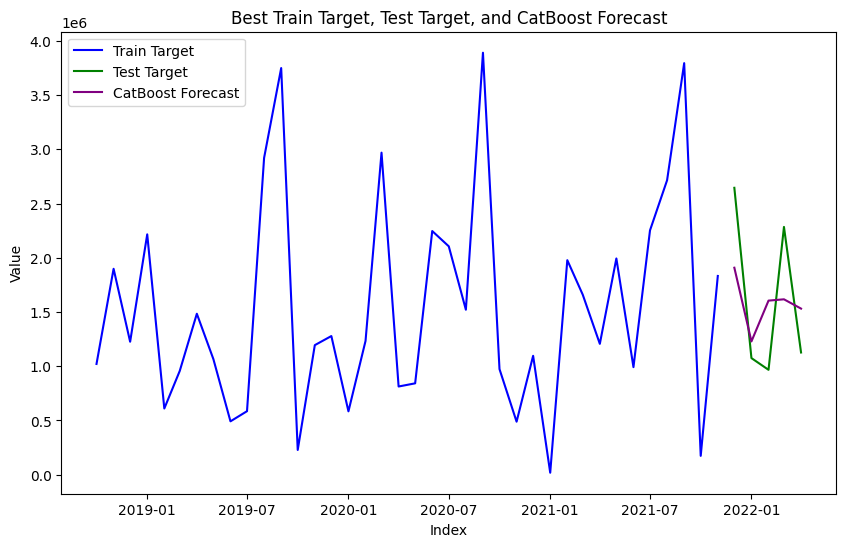

14:43:49 - cmdstanpy - INFO - Chain [1] start processing
14:43:50 - cmdstanpy - INFO - Chain [1] done processing
14:43:51 - cmdstanpy - INFO - Chain [1] start processing
14:43:52 - cmdstanpy - INFO - Chain [1] done processing
14:43:52 - cmdstanpy - INFO - Chain [1] start processing
14:43:53 - cmdstanpy - INFO - Chain [1] done processing
14:43:53 - cmdstanpy - INFO - Chain [1] start processing
14:43:54 - cmdstanpy - INFO - Chain [1] done processing
14:43:55 - cmdstanpy - INFO - Chain [1] start processing
14:43:55 - cmdstanpy - INFO - Chain [1] done processing
14:43:56 - cmdstanpy - INFO - Chain [1] start processing
14:43:56 - cmdstanpy - INFO - Chain [1] done processing
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
14:43:57 - cmdstanpy - INFO - Chain [1] done processing


Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (Prophet Forecast): 1617754.8802281923


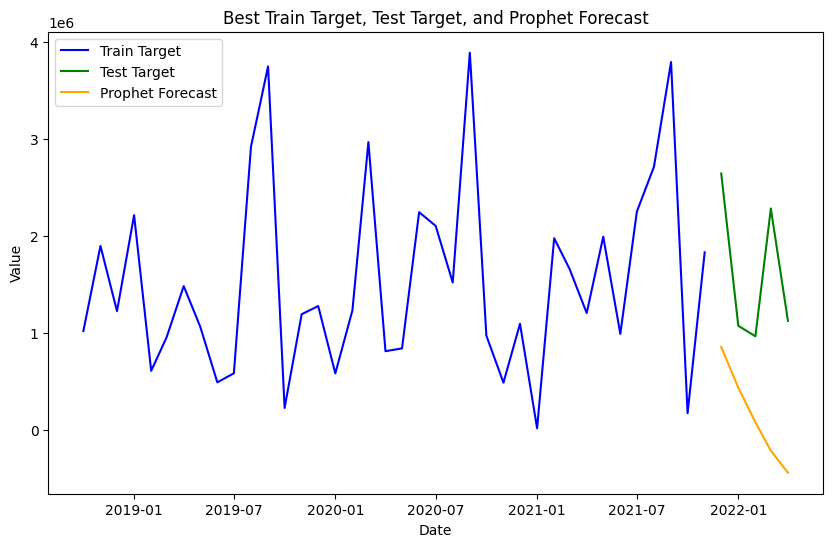

RMSE values:
CatBoost: 562751.3388048734
Prophet: 1617754.8802281923

Best method: CatBoost (RMSE: 562751.3388048734)


'CatBoost'

In [52]:
compare_prophet_catboost(df_11, "GCK_11")

# Source: ChatGPT

The model with lowest RMSE on test set is CatBoost, it will be used to ensemble

In [53]:
df_=df_11.drop(columns=["GCK_11"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [54]:
df_11_future = prophet_predict_and_join(df_, "#11")
df_11_future.head()

14:43:59 - cmdstanpy - INFO - Chain [1] start processing
14:43:59 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:44:00 - cmdstanpy - INFO - Chain [1] start processing
14:44:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:44:01 - cmdstanpy - INFO - Chain [1] start processing
14:44:01 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#11,China Production Index ME_lag_7,France Shipments Index ME_lag_9,Italy Shipments Index ME_lag_9,Japan Production Index ME_lag_6,UK Shipments Index ME_lag_4,US Shipments Index ME_lag_3,Europe Shipments Index ME_lag_9,UK Producer Prices EE_lag_11,Switzerland Production Index EE_lag_2
ds,,,,,,,,,,
2022-05-31,NaN,238.778606,197.557968,157.294780,130.271754,NaN,154.883169,215.644774,161.733827,93.466092
2022-06-30,NaN,256.551630,128.558663,139.405507,112.473354,NaN,159.952931,147.566965,168.322443,91.349663
2022-07-31,NaN,251.126591,126.945102,132.364567,127.813738,NaN,164.651817,155.269289,170.220124,89.003851
2022-08-31,NaN,242.965979,114.697984,128.286851,153.339082,NaN,156.686803,148.010153,NaN,92.078964
2022-09-30,NaN,292.650664,113.065291,86.548359,119.089550,NaN,143.328190,136.229031,NaN,96.811555


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [55]:
predictions_11 = model_GCK_11.predict(df_11_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [56]:
df_11_future["#11"] = predictions_11

In [57]:
df_11_future

,#11,China Production Index ME_lag_7,France Shipments Index ME_lag_9,Italy Shipments Index ME_lag_9,Japan Production Index ME_lag_6,UK Shipments Index ME_lag_4,US Shipments Index ME_lag_3,Europe Shipments Index ME_lag_9,UK Producer Prices EE_lag_11,Switzerland Production Index EE_lag_2
ds,,,,,,,,,,
2022-05-31,2.597977e+06,238.778606,197.557968,157.294780,130.271754,NaN,154.883169,215.644774,161.733827,93.466092
2022-06-30,2.178033e+06,256.551630,128.558663,139.405507,112.473354,NaN,159.952931,147.566965,168.322443,91.349663
2022-07-31,2.556122e+06,251.126591,126.945102,132.364567,127.813738,NaN,164.651817,155.269289,170.220124,89.003851
2022-08-31,2.462667e+06,242.965979,114.697984,128.286851,153.339082,NaN,156.686803,148.010153,NaN,92.078964
2022-09-30,9.369126e+05,292.650664,113.065291,86.548359,119.089550,NaN,143.328190,136.229031,NaN,96.811555
2022-10-31,1.732488e+06,232.553007,108.454366,89.764093,134.758237,NaN,160.515176,138.265966,NaN,106.207532
2022-11-30,1.937028e+06,259.027473,152.004166,136.576692,133.437913,NaN,161.918332,167.404258,NaN,110.436504
2022-12-31,1.896876e+06,297.206235,156.587819,137.782968,144.143438,NaN,166.029193,175.921461,NaN,113.188493
2023-01-31,1.919532e+06,261.004218,136.302578,138.302934,131.281688,NaN,160.893479,175.250122,NaN,116.504316


Plot the sales predicted for each month.

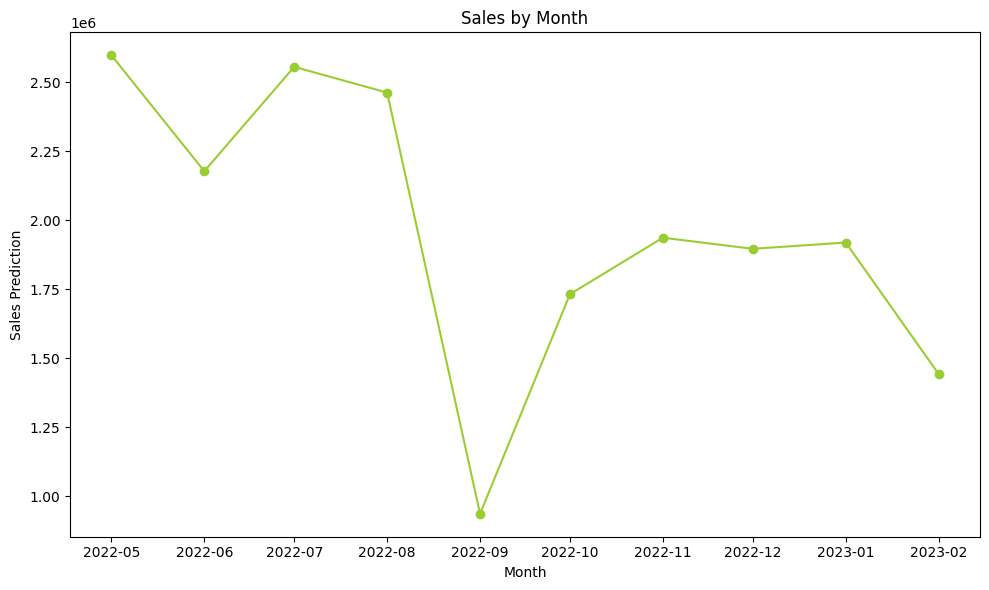

In [116]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_11_future.index, df_11_future['#11'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 12

Compare the performance of prophet and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.85
Best Test Size: 0.15000000000000002
Best RMSE (CatBoost Forecast): 68644.26132654297


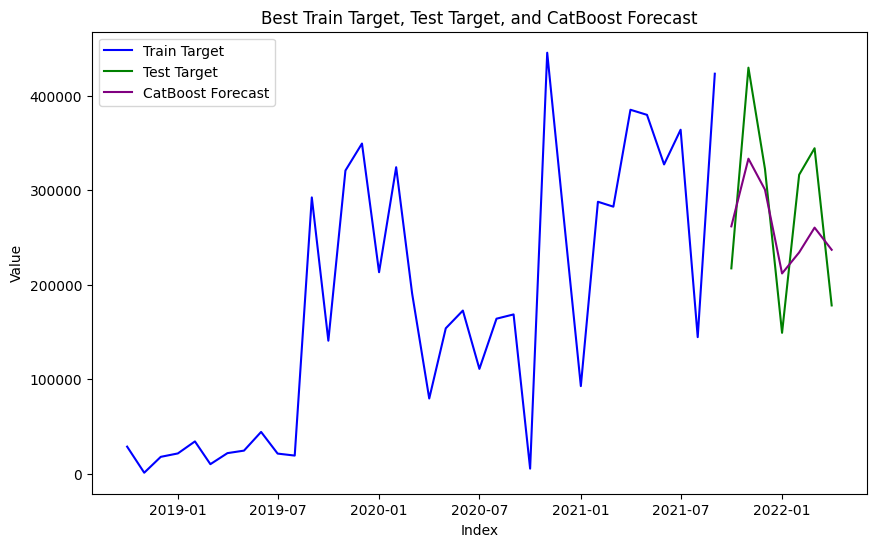

14:45:26 - cmdstanpy - INFO - Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [1] done processing
14:45:27 - cmdstanpy - INFO - Chain [1] start processing
14:45:27 - cmdstanpy - INFO - Chain [1] done processing
14:45:28 - cmdstanpy - INFO - Chain [1] start processing
14:45:28 - cmdstanpy - INFO - Chain [1] done processing
14:45:29 - cmdstanpy - INFO - Chain [1] start processing
14:45:29 - cmdstanpy - INFO - Chain [1] done processing
14:45:30 - cmdstanpy - INFO - Chain [1] start processing
14:45:30 - cmdstanpy - INFO - Chain [1] done processing
14:45:31 - cmdstanpy - INFO - Chain [1] start processing
14:45:31 - cmdstanpy - INFO - Chain [1] done processing
14:45:32 - cmdstanpy - INFO - Chain [1] start processing
14:45:32 - cmdstanpy - INFO - Chain [1] done processing


Best Train Size: 0.8
Best Test Size: 0.19999999999999996
Best RMSE (Prophet Forecast): 102485.20988258885


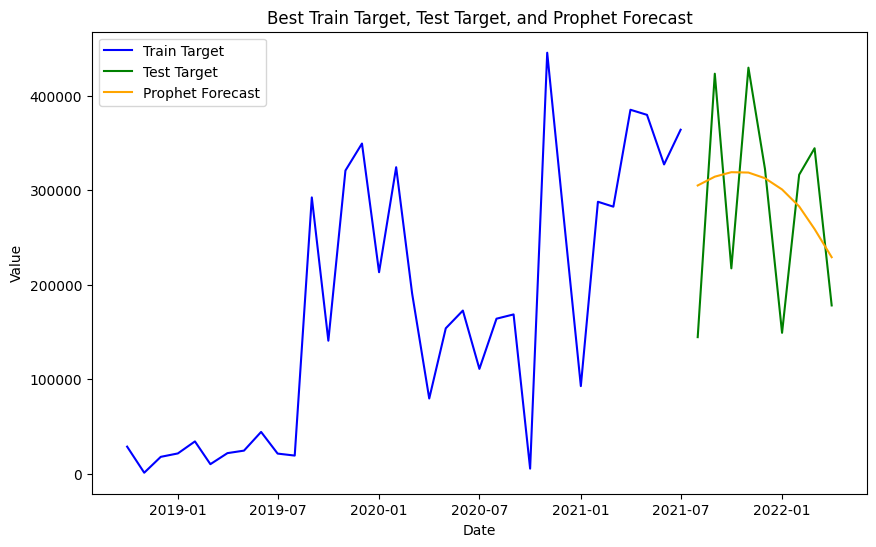

RMSE values:
CatBoost: 68644.26132654297
Prophet: 102485.20988258885

Best method: CatBoost (RMSE: 68644.26132654297)


'CatBoost'

In [58]:
compare_prophet_catboost(df_12, "GCK_12")

# Source: ChatGPT

The model with lowest RMSE on test set is CatBoost, it will be used to ensemble

In [59]:
df_=df_12.drop(columns=["GCK_12"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [60]:
df_12_future = prophet_predict_and_join(df_, "#12")
df_12_future.head()

14:45:34 - cmdstanpy - INFO - Chain [1] start processing
14:45:34 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:45:35 - cmdstanpy - INFO - Chain [1] start processing
14:45:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:45:36 - cmdstanpy - INFO - Chain [1] start processing
14:45:36 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#12,China Production Index ME_lag_6,France Production Index ME_lag_10,France Shipments Index ME_lag_10,Germany Production Index ME_lag_10,Italy Production Index ME_lag_11,Italy Shipments Index ME,Japan Production Index ME_lag_10,Switzerland Shipments Index ME_lag_8,UK Production Index ME_lag_10,UK Shipments Index ME_lag_12,US Shipments Index ME_lag_10
ds,,,,,,,,,,,,
2022-05-31,NaN,261.527912,101.889846,128.500649,101.330888,116.223695,127.778738,106.855117,104.839807,122.320387,85.019847,139.806206
2022-06-30,NaN,255.090669,137.627479,169.356770,148.449328,91.680035,133.009745,83.824377,111.379016,168.639037,81.346690,157.503680
2022-07-31,NaN,247.679223,118.234372,133.007130,126.452572,93.666961,92.564242,159.218132,117.790504,116.008562,73.820275,154.524320
2022-08-31,NaN,297.860637,109.985304,133.446599,133.651164,113.759596,145.841992,155.655279,112.950414,127.444299,133.985364,148.898105
2022-09-30,NaN,238.738265,102.757623,124.736645,125.866515,99.058034,164.623538,141.125358,108.324200,110.974798,NaN,153.410525


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [61]:
predictions_12 = model_GCK_12.predict(df_12_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [62]:
df_12_future["#12"] = predictions_12

In [63]:
df_12_future

,#12,China Production Index ME_lag_6,France Production Index ME_lag_10,France Shipments Index ME_lag_10,Germany Production Index ME_lag_10,Italy Production Index ME_lag_11,Italy Shipments Index ME,Japan Production Index ME_lag_10,Switzerland Shipments Index ME_lag_8,UK Production Index ME_lag_10,UK Shipments Index ME_lag_12,US Shipments Index ME_lag_10
ds,,,,,,,,,,,,
2022-05-31,194645.877489,261.527912,101.889846,128.500649,101.330888,116.223695,127.778738,106.855117,104.839807,122.320387,85.019847,139.806206
2022-06-30,191748.242290,255.090669,137.627479,169.356770,148.449328,91.680035,133.009745,83.824377,111.379016,168.639037,81.346690,157.503680
2022-07-31,152656.809618,247.679223,118.234372,133.007130,126.452572,93.666961,92.564242,159.218132,117.790504,116.008562,73.820275,154.524320
2022-08-31,185203.475478,297.860637,109.985304,133.446599,133.651164,113.759596,145.841992,155.655279,112.950414,127.444299,133.985364,148.898105
2022-09-30,163014.562260,238.738265,102.757623,124.736645,125.866515,99.058034,164.623538,141.125358,108.324200,110.974798,NaN,153.410525
2022-10-31,202981.744412,266.718101,101.752190,127.858048,113.499650,74.162365,152.486256,124.415381,103.972087,117.929617,NaN,145.985948
2022-11-30,198086.723964,306.036352,104.041181,128.506687,120.905312,84.259071,168.515477,142.534898,107.676199,122.419543,NaN,153.258317
2022-12-31,199229.354238,269.421017,148.018574,176.000792,139.815384,88.742342,112.369157,170.896025,111.186616,150.208775,NaN,174.228462
2023-01-31,228001.000183,272.320389,155.024853,180.856987,149.354723,136.677001,107.578009,138.838373,114.696868,166.568199,NaN,181.920720


Plot the sales predicted for each month.

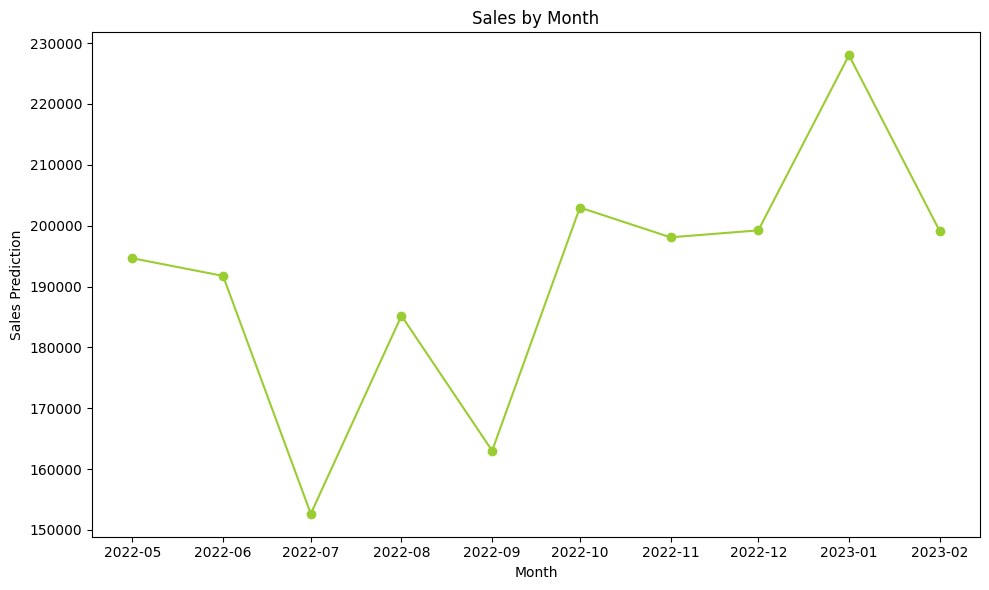

In [115]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_12_future.index, df_12_future['#12'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 13

Compare the performance of mean, median and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (Mean Forecast): 9851.435480615142


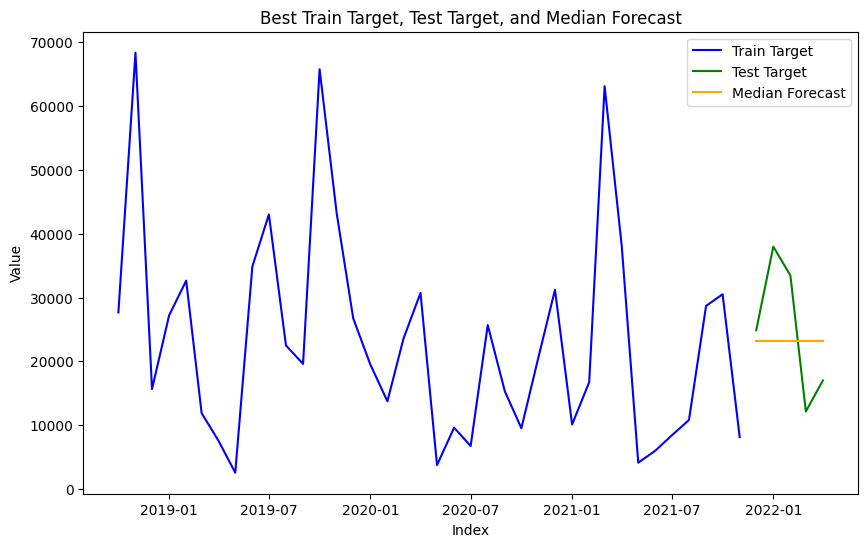

Best Train Size: 0.8
Best Test Size: 0.19999999999999996
Best RMSE (Median Forecast): 10556.22117492716


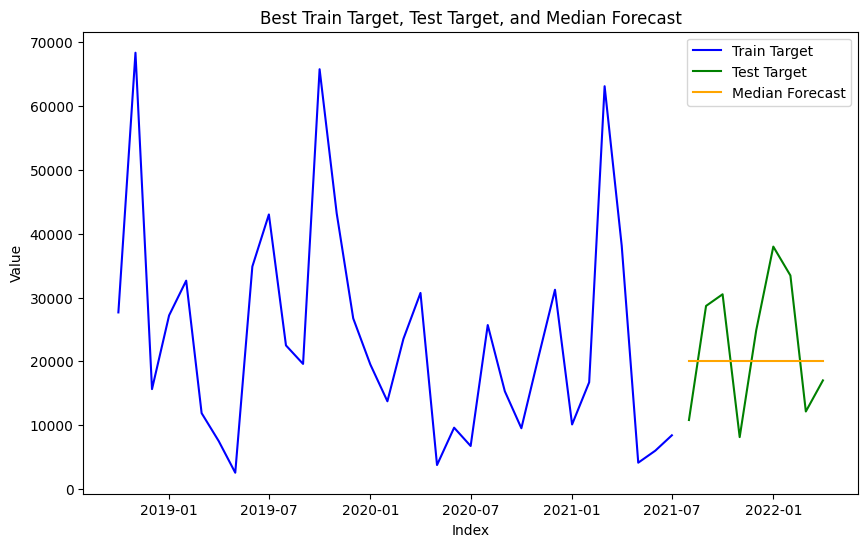

Best Train Size: 0.8
Best Test Size: 0.19999999999999996
Best RMSE (CatBoost Forecast): 11415.811838218788


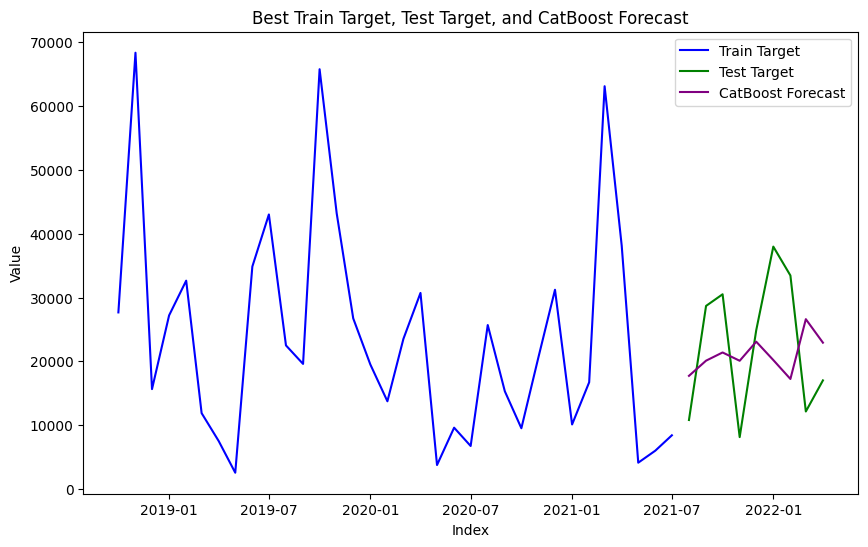

RMSE values:
Mean: 9851.435480615142
Median: 10556.22117492716
CatBoost: 11415.811838218788

Best method: Mean (RMSE: 9851.435480615142)


'Mean'

In [64]:
compare_mean_median_catboost(df_13, "GCK_13")

The model with lowest RMSE on test set is using the Mean, it will be used to ensemble

In [65]:
df_=df_13.drop(columns=["GCK_13"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [66]:
df_13_future = prophet_predict_and_join(df_, "#13")
df_13_future.head()

14:45:52 - cmdstanpy - INFO - Chain [1] start processing
14:45:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:45:53 - cmdstanpy - INFO - Chain [1] start processing
14:45:54 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:45:55 - cmdstanpy - INFO - Chain [1] start processing
14:45:55 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#13,China Production Index ME_lag_2,France Production Index ME_lag_1,France Shipments Index ME_lag_11,Japan Production Index ME_lag_12,UK Production Index ME_lag_1,US Shipments Index ME_lag_11,World: Price of Metals & Minerals_lag_1,France Producer Prices EE_lag_11,Switzerland Machinery and Equipment NEC,Germany Machinery and Equipment NEC,World Production Index EE_lag_8,Switzerland Production Index EE,UK Production Index EE_lag_11,Italy Production Index EE_lag_5
ds,,,,,,,,,,,,,,,
2022-05-31,NaN,267.671758,92.429247,96.560512,157.336949,115.367410,136.551450,160.414823,104.320168,105.694722,91.785861,147.677663,88.798730,95.653739,78.500552
2022-06-30,NaN,302.130653,80.838058,100.563958,134.724131,99.612289,123.087949,161.301330,104.618493,105.413695,116.951086,148.167077,92.345882,133.361095,73.653712
2022-07-31,NaN,345.193833,97.053896,138.638261,109.829173,104.173388,148.025148,169.076121,104.450827,104.776924,107.100454,135.058680,97.276857,173.025646,100.920406
2022-08-31,NaN,308.633473,68.479239,122.504682,92.571753,98.276977,148.380843,159.857915,105.387697,106.514011,119.948749,137.800719,106.686582,114.530392,88.833542
2022-09-30,NaN,304.931977,111.885211,120.956204,157.568884,113.901250,140.270309,170.503262,105.031305,106.641838,118.184147,138.060448,110.673098,122.208066,92.287964


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [67]:
predictions_13 = model_GCK_13.predict(df_13_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [68]:
df_13_future["#13"] = predictions_13

In [69]:
df_13_future

,#13,China Production Index ME_lag_2,France Production Index ME_lag_1,France Shipments Index ME_lag_11,Japan Production Index ME_lag_12,UK Production Index ME_lag_1,US Shipments Index ME_lag_11,World: Price of Metals & Minerals_lag_1,France Producer Prices EE_lag_11,Switzerland Machinery and Equipment NEC,Germany Machinery and Equipment NEC,World Production Index EE_lag_8,Switzerland Production Index EE,UK Production Index EE_lag_11,Italy Production Index EE_lag_5
ds,,,,,,,,,,,,,,,
2022-05-31,19510.953876,267.671758,92.429247,96.560512,157.336949,115.367410,136.551450,160.414823,104.320168,105.694722,91.785861,147.677663,88.798730,95.653739,78.500552
2022-06-30,18907.114740,302.130653,80.838058,100.563958,134.724131,99.612289,123.087949,161.301330,104.618493,105.413695,116.951086,148.167077,92.345882,133.361095,73.653712
2022-07-31,16777.674797,345.193833,97.053896,138.638261,109.829173,104.173388,148.025148,169.076121,104.450827,104.776924,107.100454,135.058680,97.276857,173.025646,100.920406
2022-08-31,17738.627679,308.633473,68.479239,122.504682,92.571753,98.276977,148.380843,159.857915,105.387697,106.514011,119.948749,137.800719,106.686582,114.530392,88.833542
2022-09-30,25324.658673,304.931977,111.885211,120.956204,157.568884,113.901250,140.270309,170.503262,105.031305,106.641838,118.184147,138.060448,110.673098,122.208066,92.287964
2022-10-31,26403.782319,305.798953,114.810609,111.070795,152.994409,125.312927,142.644694,184.749525,104.915978,113.579122,123.985400,157.434113,112.704802,101.539339,75.251418
2022-11-30,27148.385963,304.367494,106.775355,113.614336,136.962079,117.291965,132.508983,182.588724,106.276086,120.159049,130.977082,157.364795,115.042776,107.172219,93.796448
2022-12-31,19461.131425,299.735200,98.689809,113.506290,118.581211,108.721795,136.654097,171.480374,105.709431,114.128936,102.658599,164.038660,112.801935,116.602981,47.166767
2023-01-31,22549.369353,308.648759,92.927294,158.961134,135.301513,113.390694,154.699999,166.561521,105.816549,108.571166,104.786212,159.434491,109.945443,134.499856,97.721851


Plot the sales predicted for each month.

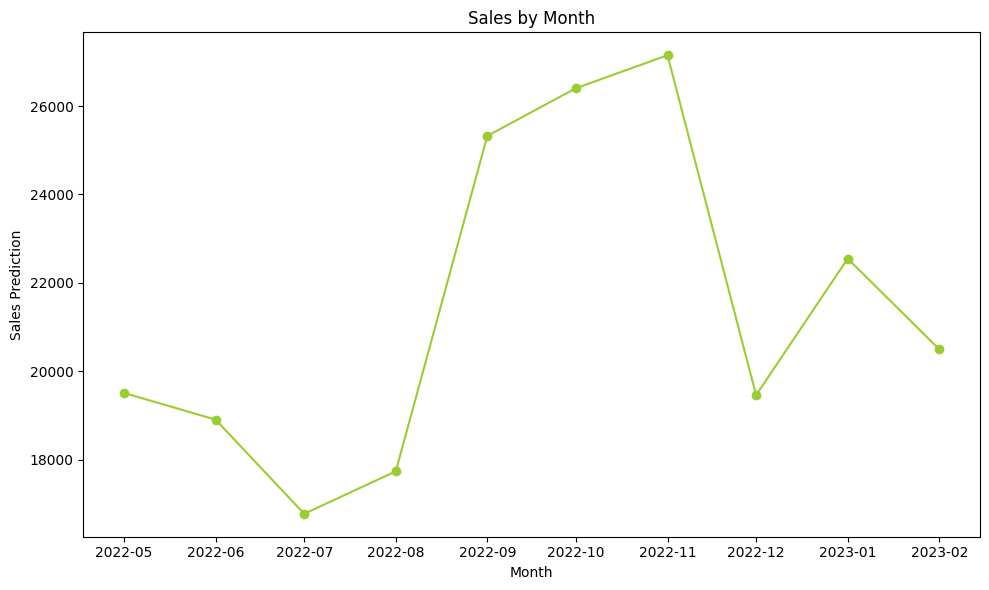

In [114]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_13_future.index, df_13_future['#13'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 14

Compare the performance of prophet and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.8
Best Test Size: 0.19999999999999996
Best RMSE (CatBoost Forecast): 11768.681476647736


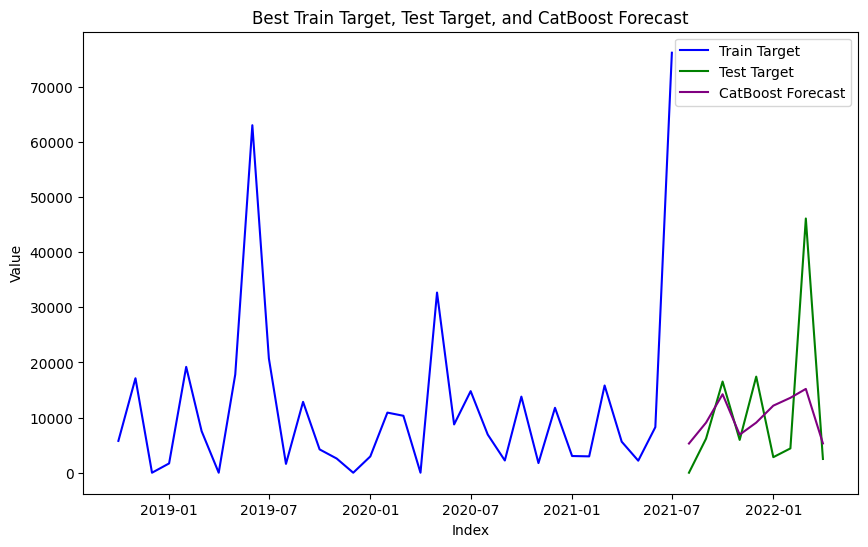

14:47:08 - cmdstanpy - INFO - Chain [1] start processing
14:47:09 - cmdstanpy - INFO - Chain [1] done processing
14:47:10 - cmdstanpy - INFO - Chain [1] start processing
14:47:10 - cmdstanpy - INFO - Chain [1] done processing
14:47:11 - cmdstanpy - INFO - Chain [1] start processing
14:47:12 - cmdstanpy - INFO - Chain [1] done processing
14:47:12 - cmdstanpy - INFO - Chain [1] start processing
14:47:13 - cmdstanpy - INFO - Chain [1] done processing
14:47:14 - cmdstanpy - INFO - Chain [1] start processing
14:47:14 - cmdstanpy - INFO - Chain [1] done processing
14:47:15 - cmdstanpy - INFO - Chain [1] start processing
14:47:15 - cmdstanpy - INFO - Chain [1] done processing
14:47:16 - cmdstanpy - INFO - Chain [1] start processing
14:47:16 - cmdstanpy - INFO - Chain [1] done processing


Best Train Size: 0.7
Best Test Size: 0.30000000000000004
Best RMSE (Prophet Forecast): 28171.206128042704


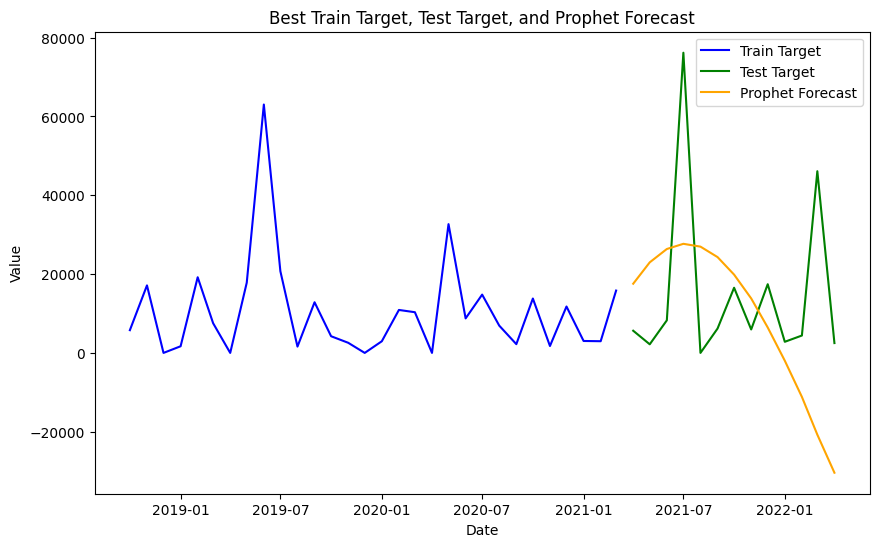

RMSE values:
CatBoost: 11768.681476647736
Prophet: 28171.206128042704

Best method: CatBoost (RMSE: 11768.681476647736)


'CatBoost'

In [70]:
compare_prophet_catboost(df_14, "GCK_14")

# Source: ChatGPT

The model with lowest RMSE on test set is CatBoost, it will be used to ensemble

In [71]:
df_=df_14.drop(columns=["GCK_14"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [72]:
df_14_future = prophet_predict_and_join(df_, "#14")
df_14_future.head()

14:47:18 - cmdstanpy - INFO - Chain [1] start processing
14:47:18 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:47:19 - cmdstanpy - INFO - Chain [1] start processing
14:47:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:47:20 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#14,France Shipments Index ME_lag_11,Japan Production Index ME_lag_4,UK Production Index ME_lag_4,UK Shipments Index ME_lag_8,World Machinery and Equipment NEC_lag_3,Switzerland Production Index EE_lag_7,UK Production Index EE_lag_4,Japan Production Index EE_lag_3,Germany Production Index EE_lag_4
ds,,,,,,,,,,
2022-05-31,NaN,96.560512,129.324194,94.648529,NaN,149.487237,121.881505,110.615960,128.389658,103.667850
2022-06-30,NaN,100.563958,154.940402,114.218777,NaN,141.842142,122.283671,119.257640,102.430770,114.625969
2022-07-31,NaN,138.638261,117.777035,124.435203,NaN,143.159536,114.003564,134.983004,109.887871,119.071872
2022-08-31,NaN,122.504682,128.344305,115.457420,NaN,133.425140,105.989779,126.984642,108.982893,124.479094
2022-09-30,NaN,120.956204,122.367444,97.784499,NaN,135.570012,98.396865,113.721359,114.010591,94.407867


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [73]:
predictions_14 = model_GCK_14.predict(df_14_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [74]:
df_14_future["#14"] = predictions_14

In [75]:
df_14_future

,#14,France Shipments Index ME_lag_11,Japan Production Index ME_lag_4,UK Production Index ME_lag_4,UK Shipments Index ME_lag_8,World Machinery and Equipment NEC_lag_3,Switzerland Production Index EE_lag_7,UK Production Index EE_lag_4,Japan Production Index EE_lag_3,Germany Production Index EE_lag_4
ds,,,,,,,,,,
2022-05-31,26944.007595,96.560512,129.324194,94.648529,NaN,149.487237,121.881505,110.615960,128.389658,103.667850
2022-06-30,29347.943985,100.563958,154.940402,114.218777,NaN,141.842142,122.283671,119.257640,102.430770,114.625969
2022-07-31,27140.029169,138.638261,117.777035,124.435203,NaN,143.159536,114.003564,134.983004,109.887871,119.071872
2022-08-31,21653.323102,122.504682,128.344305,115.457420,NaN,133.425140,105.989779,126.984642,108.982893,124.479094
2022-09-30,9475.622536,120.956204,122.367444,97.784499,NaN,135.570012,98.396865,113.721359,114.010591,94.407867
2022-10-31,10772.012349,111.070795,128.509467,101.910042,NaN,129.553229,99.648832,116.887037,90.608689,116.068857
2022-11-30,13083.267343,113.614336,112.384070,99.026385,NaN,152.156136,100.626443,109.545560,118.753877,111.072914
2022-12-31,20814.189108,113.506290,151.665459,118.526507,NaN,151.084504,101.500129,129.655750,105.539123,118.015911
2023-01-31,27509.173211,158.961134,126.246417,132.824866,NaN,151.240913,107.104326,143.929444,112.677088,127.829881


Plot the sales predicted for each month.

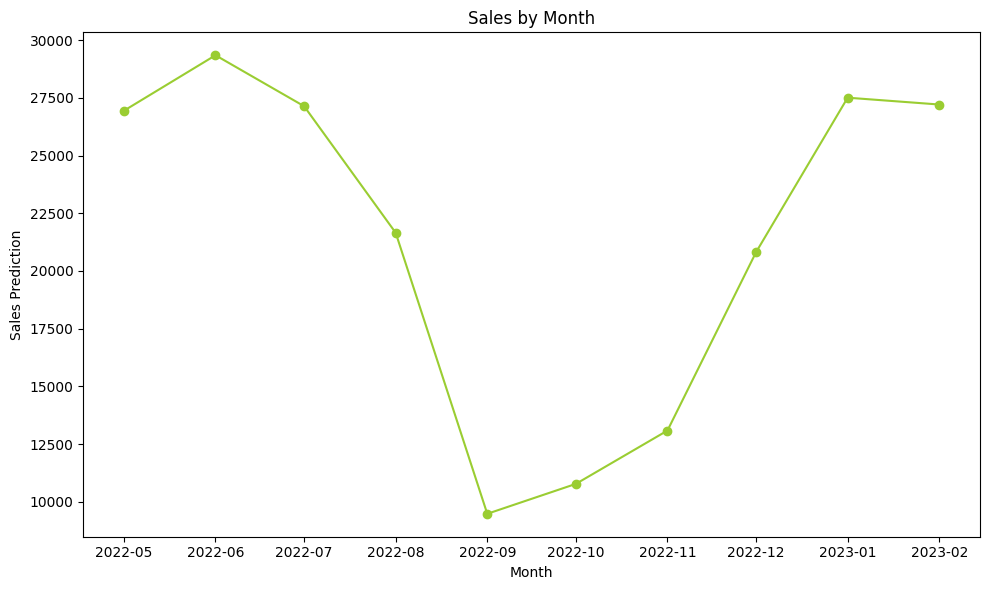

In [113]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_14_future.index, df_14_future['#14'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 16

Compare the performance of prophet and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (CatBoost Forecast): 140103.02352773433


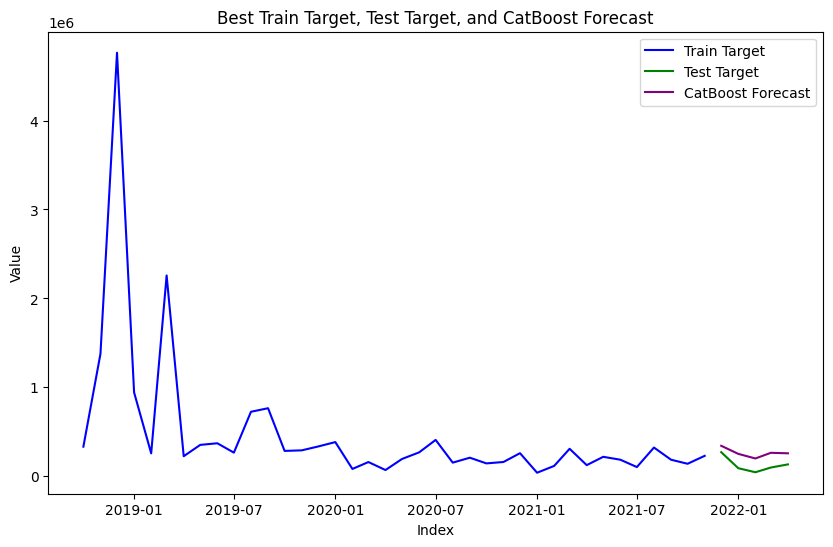

14:47:33 - cmdstanpy - INFO - Chain [1] start processing
14:47:35 - cmdstanpy - INFO - Chain [1] done processing
14:47:35 - cmdstanpy - INFO - Chain [1] start processing
14:47:36 - cmdstanpy - INFO - Chain [1] done processing
14:47:36 - cmdstanpy - INFO - Chain [1] start processing
14:47:37 - cmdstanpy - INFO - Chain [1] done processing
14:47:38 - cmdstanpy - INFO - Chain [1] start processing
14:47:38 - cmdstanpy - INFO - Chain [1] done processing
14:47:39 - cmdstanpy - INFO - Chain [1] start processing
14:47:39 - cmdstanpy - INFO - Chain [1] done processing
14:47:40 - cmdstanpy - INFO - Chain [1] start processing
14:47:40 - cmdstanpy - INFO - Chain [1] done processing
14:47:41 - cmdstanpy - INFO - Chain [1] start processing
14:47:42 - cmdstanpy - INFO - Chain [1] done processing


Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (Prophet Forecast): 909477.6141711465


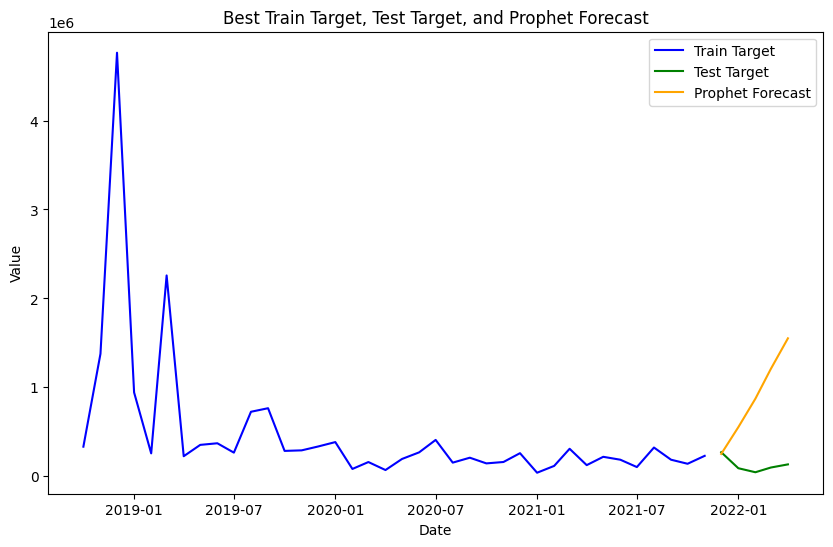

RMSE values:
CatBoost: 140103.02352773433
Prophet: 909477.6141711465

Best method: CatBoost (RMSE: 140103.02352773433)


'CatBoost'

In [76]:
compare_prophet_catboost(df_16, "GCK_16")

# Source: ChatGPT

The model with lowest RMSE on test set is CatBoost, it will be used to ensemble

In [77]:
df_=df_16.drop(columns=["GCK_16"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [78]:
df_16_future = prophet_predict_and_join(df_, "#16")
df_16_future.head()

14:47:43 - cmdstanpy - INFO - Chain [1] start processing
14:47:43 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:47:44 - cmdstanpy - INFO - Chain [1] start processing
14:47:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:47:45 - cmdstanpy - INFO - Chain [1] start processing
14:47:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#16,China Production Index ME_lag_7,France Production Index ME_lag_6,France Shipments Index ME_lag_6,Germany Shipments Index ME_lag_9,Italy Production Index ME_lag_6,Japan Production Index ME_lag_6,Switzerland Production Index ME_lag_9,World Natural Gas Price Index_lag_10,Germany Producer Prices EE_lag_10,US Production Index EE_lag_7,France Production Index EE_lag_5,Covid_boolean_lag_7
ds,,,,,,,,,,,,,
2022-05-31,NaN,238.778606,88.610537,106.718823,204.371127,80.596223,130.271754,95.878437,51.077891,111.774521,121.859655,73.073821,1.658744
2022-06-30,NaN,256.551630,80.523820,100.753865,148.505625,83.968409,112.473354,99.142619,-24.014545,115.137457,120.533860,64.182627,1.782033
2022-07-31,NaN,251.126591,74.907309,92.351161,154.912098,80.365113,127.813738,107.191184,101.030657,112.937967,113.841902,94.917843,1.088152
2022-08-31,NaN,242.965979,110.728519,130.738741,152.932707,121.156630,153.339082,114.890594,96.732834,112.159673,113.286510,100.195282,1.446776
2022-09-30,NaN,292.650664,113.209161,131.317424,132.710719,107.524133,119.089550,109.629004,84.851681,112.371122,115.935653,81.510330,1.733259


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [79]:
predictions_16 = model_GCK_16.predict(df_16_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [80]:
df_16_future["#16"] = predictions_16

In [81]:
df_16_future

,#16,China Production Index ME_lag_7,France Production Index ME_lag_6,France Shipments Index ME_lag_6,Germany Shipments Index ME_lag_9,Italy Production Index ME_lag_6,Japan Production Index ME_lag_6,Switzerland Production Index ME_lag_9,World Natural Gas Price Index_lag_10,Germany Producer Prices EE_lag_10,US Production Index EE_lag_7,France Production Index EE_lag_5,Covid_boolean_lag_7
ds,,,,,,,,,,,,,
2022-05-31,272928.843019,238.778606,88.610537,106.718823,204.371127,80.596223,130.271754,95.878437,51.077891,111.774521,121.859655,73.073821,1.658744
2022-06-30,287288.790108,256.551630,80.523820,100.753865,148.505625,83.968409,112.473354,99.142619,-24.014545,115.137457,120.533860,64.182627,1.782033
2022-07-31,335938.556085,251.126591,74.907309,92.351161,154.912098,80.365113,127.813738,107.191184,101.030657,112.937967,113.841902,94.917843,1.088152
2022-08-31,396834.413627,242.965979,110.728519,130.738741,152.932707,121.156630,153.339082,114.890594,96.732834,112.159673,113.286510,100.195282,1.446776
2022-09-30,300595.602651,292.650664,113.209161,131.317424,132.710719,107.524133,119.089550,109.629004,84.851681,112.371122,115.935653,81.510330,1.733259
2022-10-31,250566.865520,232.553007,89.786148,109.109849,133.610114,108.527795,134.758237,104.313474,54.883312,113.196893,120.330048,69.602962,1.901089
2022-11-30,288604.670028,259.027473,77.539334,97.495887,154.726488,87.697810,133.437913,98.987598,37.379889,113.700108,123.758240,86.018963,1.902389
2022-12-31,287635.566818,297.206235,94.092510,101.305984,169.194726,102.955720,144.143438,100.897529,41.691017,114.790361,122.560186,65.530574,1.738936
2023-01-31,349705.524392,261.004218,66.936658,91.845515,172.999993,49.487423,131.281688,102.286130,40.024705,115.361674,119.133881,95.866084,1.528936


Plot the sales predicted for each month.

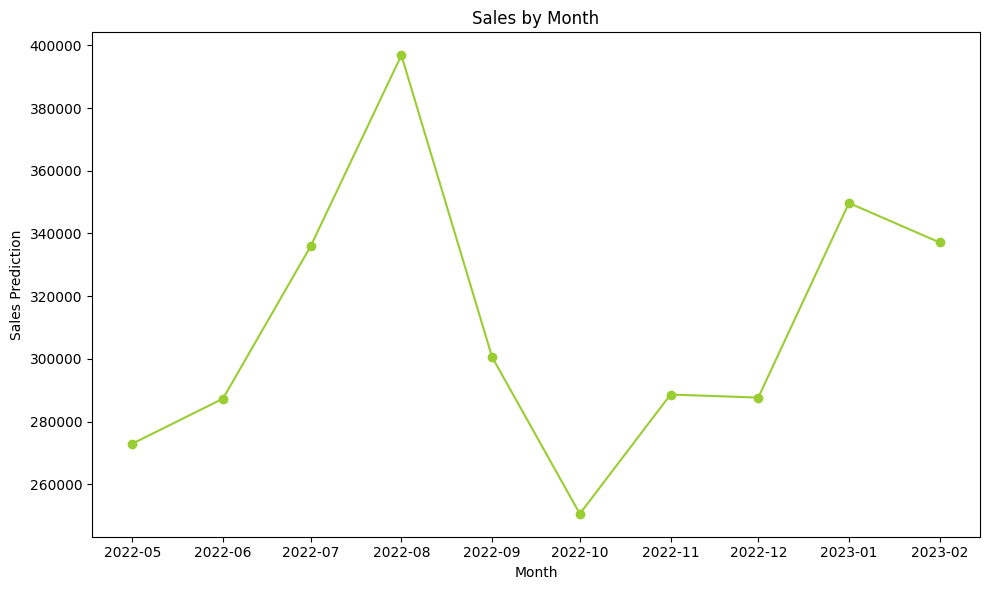

In [112]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_16_future.index, df_16_future['#16'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 20

Compare the performance of mean, median and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.75
Best Test Size: 0.25
Best RMSE (Mean Forecast): 1937.2997403501595


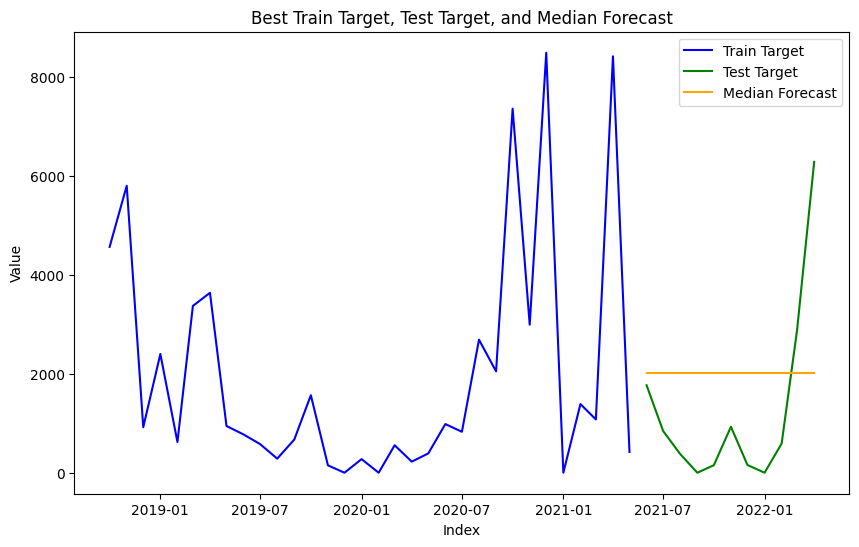

Best Train Size: 0.75
Best Test Size: 0.25
Best RMSE (Median Forecast): 1821.727642453598


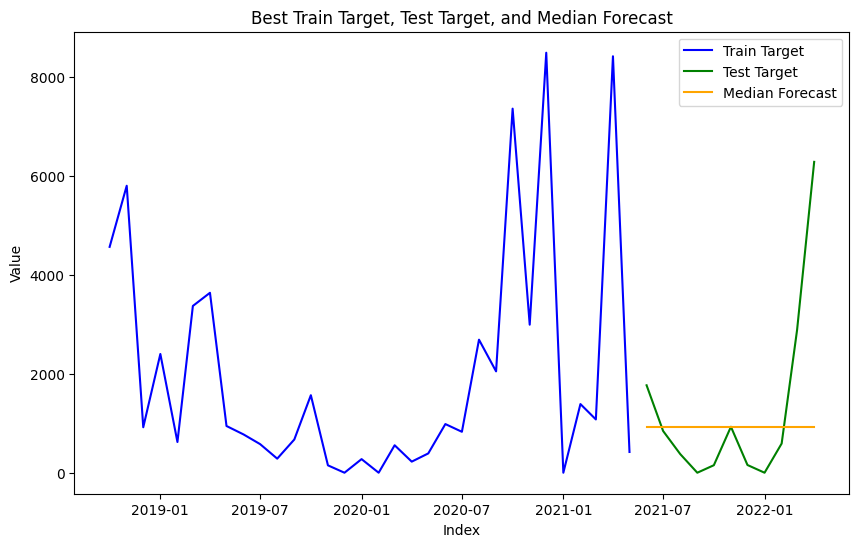

Best Train Size: 0.8
Best Test Size: 0.19999999999999996
Best RMSE (CatBoost Forecast): 1540.559563167197


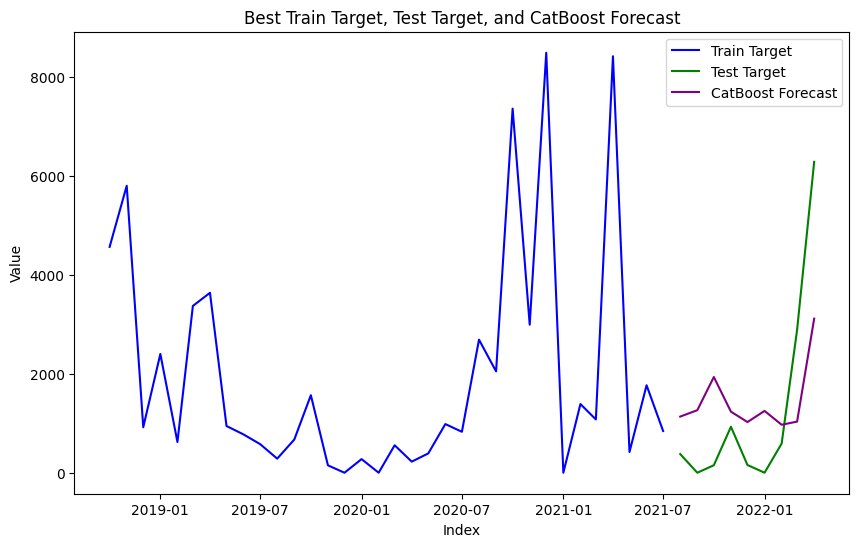

RMSE values:
Mean: 1937.2997403501595
Median: 1821.727642453598
CatBoost: 1540.559563167197

Best method: CatBoost (RMSE: 1540.559563167197)


'CatBoost'

In [82]:
compare_mean_median_catboost(df_20, "GCK_20")

# Source: ChatGPT

The model with lowest RMSE on test set is Catboost, it will be used to ensemble

In [83]:
df_=df_20.drop(columns=["GCK_20"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [84]:
df_20_future = prophet_predict_and_join(df_, "#20")
df_20_future.head()

14:49:33 - cmdstanpy - INFO - Chain [1] start processing
14:49:34 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:49:34 - cmdstanpy - INFO - Chain [1] start processing
14:49:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:49:36 - cmdstanpy - INFO - Chain [1] start processing
14:49:37 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#20,China Production Index ME_lag_4,Germany Shipments Index ME_lag_8,Italy Production Index ME_lag_8,Italy Shipments Index ME_lag_8,Japan Production Index ME_lag_8,Europe Production Index ME_lag_8,World Base Metals Price_lag_7,World Energy Price_lag_7,UK Producer Prices EE_lag_2,US Machinery and Equipment NEC_lag_5,World Machinery and Equipment NEC_lag_8,World Production Index EE_lag_1,UK Production Index EE_lag_1,Germany Production Index EE_lag_4
ds,,,,,,,,,,,,,,,
2022-05-31,NaN,264.164414,145.737911,123.932708,137.276572,151.353347,129.089326,166.776932,92.359635,NaN,112.893651,146.126135,143.137722,130.466384,103.667850
2022-06-30,NaN,315.372497,151.911352,112.892008,139.250732,147.643801,132.796175,165.321200,64.405951,NaN,112.358576,146.315252,136.543739,120.060272,114.625969
2022-07-31,NaN,258.190337,149.888195,87.466649,142.727000,132.516632,120.070078,163.998392,66.615753,NaN,116.533171,134.656854,141.605420,124.213533,119.071872
2022-08-31,NaN,286.439578,130.722272,93.433601,106.252124,115.196422,114.632906,178.124500,77.482117,NaN,128.820618,129.437331,137.053607,114.054911,124.479094
2022-09-30,NaN,326.559135,133.107781,92.272956,112.221866,133.403937,116.246776,186.922152,98.736421,NaN,122.430156,133.982274,151.976021,130.472522,94.407867


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [85]:
predictions_20 = model_GCK_20.predict(df_20_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [86]:
df_20_future["#20"] = predictions_20

In [87]:
df_20_future

,#20,China Production Index ME_lag_4,Germany Shipments Index ME_lag_8,Italy Production Index ME_lag_8,Italy Shipments Index ME_lag_8,Japan Production Index ME_lag_8,Europe Production Index ME_lag_8,World Base Metals Price_lag_7,World Energy Price_lag_7,UK Producer Prices EE_lag_2,US Machinery and Equipment NEC_lag_5,World Machinery and Equipment NEC_lag_8,World Production Index EE_lag_1,UK Production Index EE_lag_1,Germany Production Index EE_lag_4
ds,,,,,,,,,,,,,,,
2022-05-31,1455.819129,264.164414,145.737911,123.932708,137.276572,151.353347,129.089326,166.776932,92.359635,NaN,112.893651,146.126135,143.137722,130.466384,103.667850
2022-06-30,1291.522420,315.372497,151.911352,112.892008,139.250732,147.643801,132.796175,165.321200,64.405951,NaN,112.358576,146.315252,136.543739,120.060272,114.625969
2022-07-31,1189.278287,258.190337,149.888195,87.466649,142.727000,132.516632,120.070078,163.998392,66.615753,NaN,116.533171,134.656854,141.605420,124.213533,119.071872
2022-08-31,1374.649669,286.439578,130.722272,93.433601,106.252124,115.196422,114.632906,178.124500,77.482117,NaN,128.820618,129.437331,137.053607,114.054911,124.479094
2022-09-30,1713.221271,326.559135,133.107781,92.272956,112.221866,133.403937,116.246776,186.922152,98.736421,NaN,122.430156,133.982274,151.976021,130.472522,94.407867
2022-10-31,1372.948823,290.881557,155.535994,137.137185,158.492108,162.964570,141.126301,192.835587,113.841252,NaN,121.800672,159.474459,151.996464,140.974433,116.068857
2022-11-30,1326.160249,292.072869,170.821005,126.452401,156.827562,133.004724,147.641387,187.075882,100.353405,NaN,108.811926,154.500718,151.108808,133.120108,111.072914
2022-12-31,1518.292115,301.471413,175.977742,131.115146,158.825203,151.963118,148.893582,191.121160,76.018276,NaN,119.398660,158.305890,143.430558,131.166816,118.015911
2023-01-31,1200.191812,300.283433,146.715072,109.858336,146.063527,151.576215,128.721118,200.058373,73.883487,NaN,121.564224,151.575633,131.147749,132.284712,127.829881


Plot the sales predicted for each month.

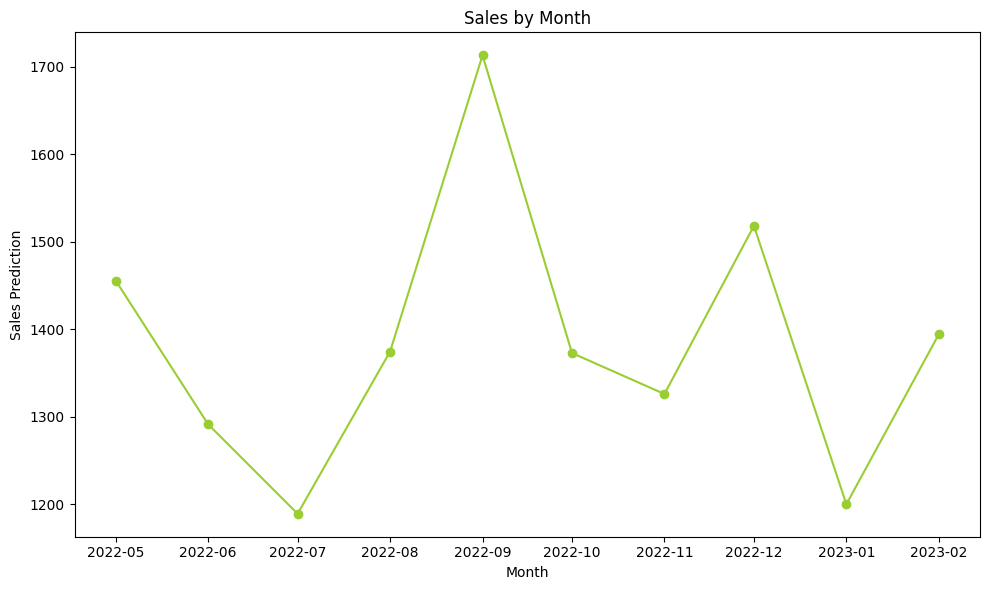

In [111]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_20_future.index, df_20_future['#20'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

## Product Group 36

Compare the performance of prophet and catboost, and choose the one with lowest RMSE.

Best Train Size: 0.85
Best Test Size: 0.15000000000000002
Best RMSE (CatBoost Forecast): 18043.426381084082


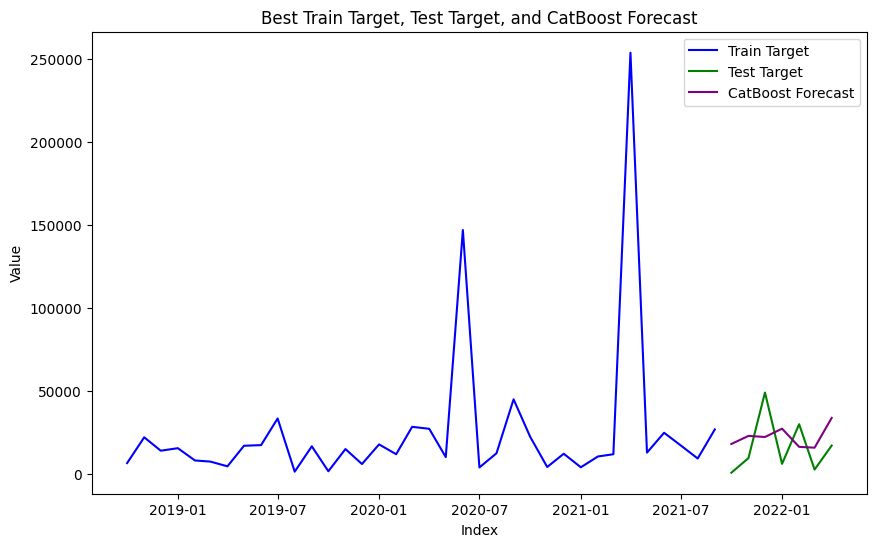

14:51:06 - cmdstanpy - INFO - Chain [1] start processing
14:51:07 - cmdstanpy - INFO - Chain [1] done processing
14:51:08 - cmdstanpy - INFO - Chain [1] start processing
14:51:08 - cmdstanpy - INFO - Chain [1] done processing
14:51:09 - cmdstanpy - INFO - Chain [1] start processing
14:51:09 - cmdstanpy - INFO - Chain [1] done processing
14:51:10 - cmdstanpy - INFO - Chain [1] start processing
14:51:10 - cmdstanpy - INFO - Chain [1] done processing
14:51:11 - cmdstanpy - INFO - Chain [1] start processing
14:51:11 - cmdstanpy - INFO - Chain [1] done processing
14:51:12 - cmdstanpy - INFO - Chain [1] start processing
14:51:12 - cmdstanpy - INFO - Chain [1] done processing
14:51:13 - cmdstanpy - INFO - Chain [1] start processing
14:51:13 - cmdstanpy - INFO - Chain [1] done processing


Best Train Size: 0.9
Best Test Size: 0.09999999999999998
Best RMSE (Prophet Forecast): 36710.3950405791


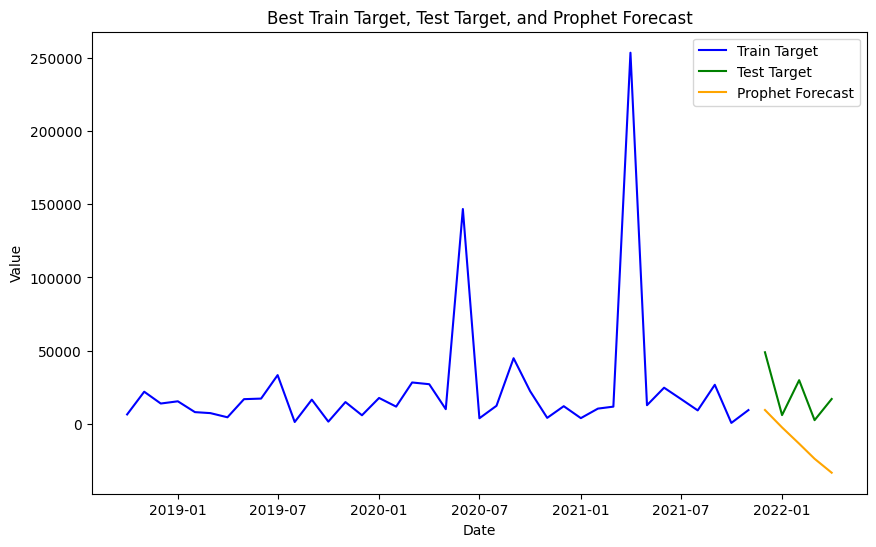

RMSE values:
CatBoost: 18043.426381084082
Prophet: 36710.3950405791

Best method: CatBoost (RMSE: 18043.426381084082)


'CatBoost'

In [88]:
compare_prophet_catboost(df_36, "GCK_36")

# Source: ChatGPT

The model with lowest RMSE on test set is CatBoost, it will be used to ensemble

In [89]:
df_=df_36.drop(columns=["GCK_36"])

Use prophet to make future feature predictions and join them data to the newly created dataframe.

In [90]:
df_36_future = prophet_predict_and_join(df_, "#36")
df_36_future.head()

14:51:14 - cmdstanpy - INFO - Chain [1] start processing
14:51:15 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:51:15 - cmdstanpy - INFO - Chain [1] start processing
14:51:16 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
14:51:16 - cmdstanpy - INFO - Chain [1] start processing
14:51:17 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.P

,#36,China Production Index ME_lag_1,France Shipments Index ME_lag_12,Italy Shipments Index ME_lag_12,Japan Shipments Index ME_lag_11,Switzerland Production Index ME,UK Shipments Index ME_lag_2,US Shipments Index ME_lag_5,Europe Shipments Index ME_lag_12,World Base Metals Price_lag_12,World Crude Oil Average Price_lag_12,UK Producer Prices EE_lag_4,Switzerland Machinery and Equipment NEC_lag_1,US Production Index EE_lag_12,Japan Production Index EE_lag_8
ds,,,,,,,,,,,,,,,
2022-05-31,NaN,298.454070,167.222036,101.328574,127.474028,97.183367,NaN,133.703078,154.970257,124.691539,42.238767,NaN,101.852878,107.546440,127.452358
2022-06-30,NaN,333.238980,99.718087,153.701136,110.973005,99.460151,NaN,137.514708,130.730543,138.859839,61.640721,NaN,105.606927,113.698338,126.280412
2022-07-31,NaN,293.564774,86.583212,94.020853,101.804485,101.857884,NaN,155.122040,107.206673,169.745012,100.733218,NaN,105.073993,108.485978,120.188163
2022-08-31,NaN,293.710769,115.417247,120.518391,162.562350,104.331472,NaN,160.032740,183.363404,158.161937,50.224261,NaN,104.413919,105.229268,100.673244
2022-09-30,NaN,303.596822,105.379129,104.021477,158.967020,104.899001,NaN,164.597291,120.391578,159.742425,91.139235,NaN,106.186311,122.015420,120.551164


Make predictions on test data based on the historical data and the predictions we've made for market data for these years.

In [91]:
predictions_36 = model_GCK_36.predict(df_36_future)

Add the newly forecasted sales to the dataset with the predicted market data.

In [92]:
df_36_future["#36"] = predictions_36

In [93]:
df_36_future

,#36,China Production Index ME_lag_1,France Shipments Index ME_lag_12,Italy Shipments Index ME_lag_12,Japan Shipments Index ME_lag_11,Switzerland Production Index ME,UK Shipments Index ME_lag_2,US Shipments Index ME_lag_5,Europe Shipments Index ME_lag_12,World Base Metals Price_lag_12,World Crude Oil Average Price_lag_12,UK Producer Prices EE_lag_4,Switzerland Machinery and Equipment NEC_lag_1,US Production Index EE_lag_12,Japan Production Index EE_lag_8
ds,,,,,,,,,,,,,,,
2022-05-31,23724.397639,298.454070,167.222036,101.328574,127.474028,97.183367,NaN,133.703078,154.970257,124.691539,42.238767,NaN,101.852878,107.546440,127.452358
2022-06-30,22264.856390,333.238980,99.718087,153.701136,110.973005,99.460151,NaN,137.514708,130.730543,138.859839,61.640721,NaN,105.606927,113.698338,126.280412
2022-07-31,19182.643061,293.564774,86.583212,94.020853,101.804485,101.857884,NaN,155.122040,107.206673,169.745012,100.733218,NaN,105.073993,108.485978,120.188163
2022-08-31,23005.166761,293.710769,115.417247,120.518391,162.562350,104.331472,NaN,160.032740,183.363404,158.161937,50.224261,NaN,104.413919,105.229268,100.673244
2022-09-30,21599.251226,303.596822,105.379129,104.021477,158.967020,104.899001,NaN,164.597291,120.391578,159.742425,91.139235,NaN,106.186311,122.015420,120.551164
2022-10-31,23483.984505,312.930512,102.648395,103.583155,143.388355,110.324688,NaN,159.564027,129.410486,158.318216,40.294331,NaN,107.150869,118.669641,141.415170
2022-11-30,32115.177577,319.305459,93.186058,110.026825,125.255670,115.476560,NaN,146.343399,124.260633,160.898601,12.676091,NaN,113.983644,116.705578,122.232307
2022-12-31,34238.873561,338.508014,95.884966,79.242199,137.494550,111.347450,NaN,162.400752,115.220865,163.635454,25.060920,NaN,120.923447,109.640573,136.293444
2023-01-31,18337.995496,184.575146,96.508796,91.239487,172.206520,107.317129,NaN,162.620212,120.878681,181.563691,51.637761,NaN,114.554930,108.961878,141.216192


Plot the sales predicted for each month.

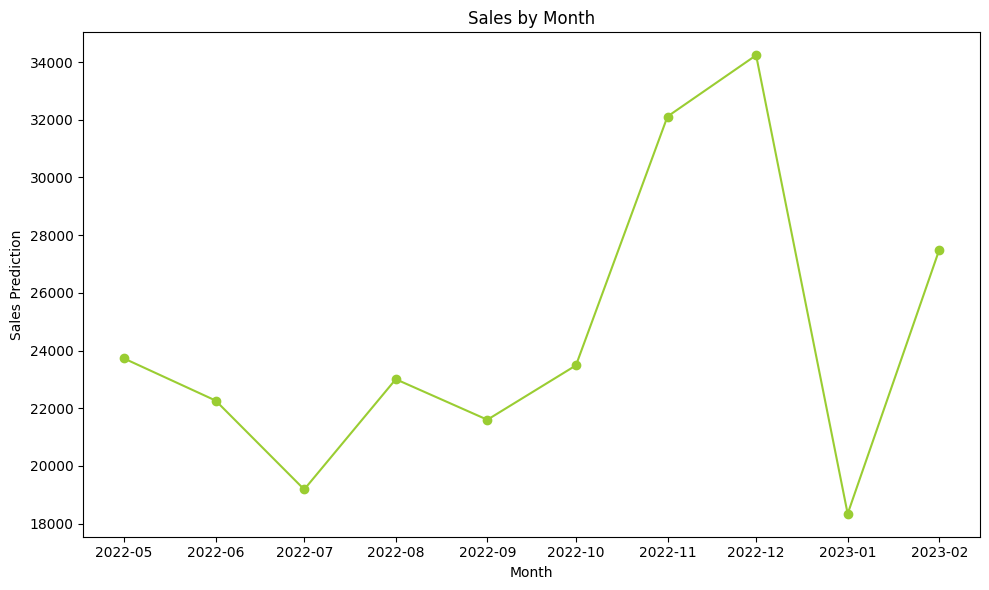

In [110]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_36_future.index, df_36_future['#36'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Prediction')
plt.xticks(rotation=0)  
plt.grid(False) 
plt.tight_layout()
plt.show()

# Final Predictions

Function to update test data with the final predictions column filled

In [94]:
def update_test_data(test_data_T, df_future, feature_column):
    # Convert index to datetime
    df_future.index = pd.to_datetime(df_future.index)
    
    # Change day to 1st of the month
    df_future.index = df_future.index.to_period('M').to_timestamp()

    # Find common dates
    common_dates = df_future.index.intersection(test_data_T.index)

    # Update feature column in test_data with values from df_future
    test_data_T.loc[common_dates, feature_column] = df_future.loc[common_dates, feature_column].values

    return test_data_T

Import test data

In [96]:
# Import test data
test_data = pd.read_excel('Case2_Test set Template.xlsx')
test_data.head()

# Source: previous notebook

,Month Year,Mapped_GCK,Sales_EUR
0,2022-05-01,#3,NaN
1,2022-06-01,#3,NaN
2,2022-07-01,#3,NaN
3,2022-08-01,#3,NaN
4,2022-09-01,#3,NaN


Create a pivot table to transpose the unique values of column "Mapped_GCK" into columns to make the imputation of the predictions made for each product group easier

In [99]:
# Pivoting to the desired format, columns as GCKs and values as test
test_data['Month Year'] = pd.to_datetime(test_data['Month Year'], format="%d.%m.%Y") 
test_data_T=test_data.pivot(index="Month Year",columns="Mapped_GCK",values="Sales_EUR")
test_data_T

Mapped_GCK,#1,#11,#12,#13,#14,#16,#20,#3,#36,#4,#5,#6,#8,#9
Month Year,,,,,,,,,,,,,,
2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Use previously created function to impute the predictions into the test data file.

In [100]:
test_data_T = update_test_data(test_data_T, df_1_future, '#1')
test_data_T = update_test_data(test_data_T, df_3_future, '#3')
test_data_T = update_test_data(test_data_T, df_4_future, '#4')
test_data_T = update_test_data(test_data_T, df_5_future, '#5')
test_data_T = update_test_data(test_data_T, df_6_future, '#6')
test_data_T = update_test_data(test_data_T, df_8_future, '#8')
test_data_T = update_test_data(test_data_T, df_9_future, '#9')
test_data_T = update_test_data(test_data_T, df_11_future, '#11')
test_data_T = update_test_data(test_data_T, df_12_future, '#12')
test_data_T = update_test_data(test_data_T, df_13_future, '#13')
test_data_T = update_test_data(test_data_T, df_14_future, '#14')
test_data_T = update_test_data(test_data_T, df_16_future, '#16')
test_data_T = update_test_data(test_data_T, df_20_future, '#20')
test_data_T = update_test_data(test_data_T, df_36_future, '#36')
print(test_data_T)

Mapped_GCK            #1           #11            #12           #13  \
Month Year                                                            
2022-05-01  4.129236e+07  2.597977e+06  194645.877489  19510.953876   
2022-06-01  3.861368e+07  2.178033e+06  191748.242290  18907.114740   
2022-07-01  3.835457e+07  2.556122e+06  152656.809618  16777.674797   
2022-08-01  3.728382e+07  2.462667e+06  185203.475478  17738.627679   
2022-09-01  4.314893e+07  9.369126e+05  163014.562260  25324.658673   
2022-10-01  4.154298e+07  1.732488e+06  202981.744412  26403.782319   
2022-11-01  4.172137e+07  1.937028e+06  198086.723964  27148.385963   
2022-12-01  4.183401e+07  1.896876e+06  199229.354238  19461.131425   
2023-01-01  4.183401e+07  1.919532e+06  228001.000183  22549.369353   
2023-02-01  3.373729e+07  1.443398e+06  199138.183583  20499.125659   

Mapped_GCK           #14            #16          #20            #3  \
Month Year                                                           
2022-05

Convert the dataset back to the structure it has

In [101]:
test_pred = pd.melt(test_data_T.reset_index(), id_vars='Month Year', var_name='Mapped_GCK', value_name='Sales_EUR')

# Convert datetime column to date-only format
test_pred['Month Year'] = test_pred['Month Year'].dt.date

test_pred.head(10)

,Month Year,Mapped_GCK,Sales_EUR
0,2022-05-01,#1,4.129236e+07
1,2022-06-01,#1,3.861368e+07
2,2022-07-01,#1,3.835457e+07
3,2022-08-01,#1,3.728382e+07
4,2022-09-01,#1,4.314893e+07
5,2022-10-01,#1,4.154298e+07
6,2022-11-01,#1,4.172137e+07
7,2022-12-01,#1,4.183401e+07
8,2023-01-01,#1,4.183401e+07
9,2023-02-01,#1,3.373729e+07


Plot sales forecast aggregate by month.

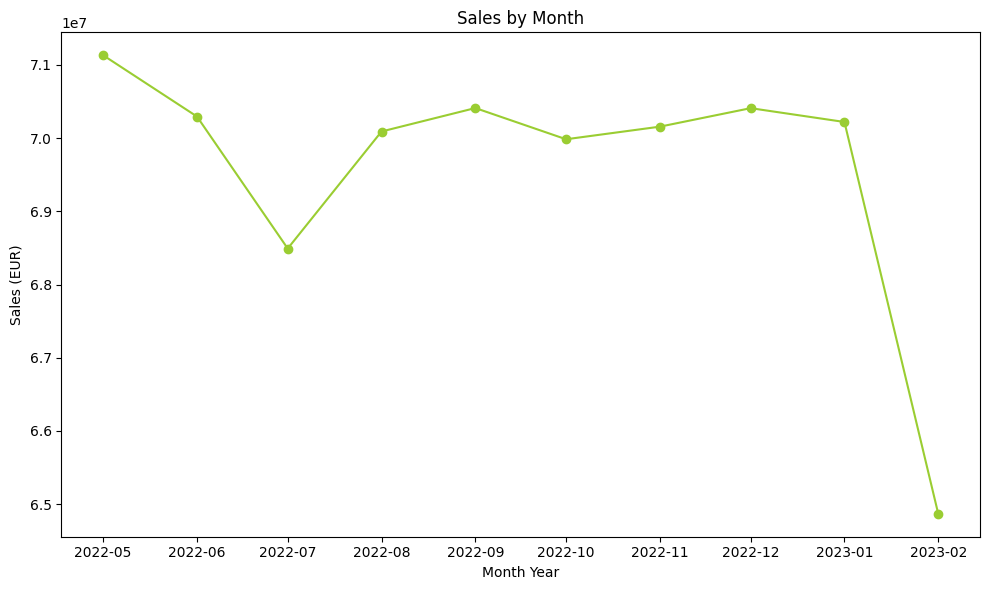

In [109]:
sales_by_month = test_pred.groupby('Month Year')['Sales_EUR'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month['Month Year'], sales_by_month['Sales_EUR'], marker='o', linestyle='-', color='yellowgreen')

plt.title('Sales by Month')
plt.xlabel('Month Year')
plt.ylabel('Sales (EUR)')
plt.xticks(rotation=0) 
plt.grid(False)
plt.tight_layout()
plt.show()

In [105]:
# Define the file path where you want to save the Excel file
file_path = 'Test set Group R.xlsx'

# Export the DataFrame to Excel
test_pred.to_excel(file_path, index=False)

print("Exported successfully to", file_path)

Exported successfully to Test set Group R.xlsx


---------